<h2>AVOCADO REGION PREDICTION MACHINE LEARNING MODEL</h2>

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import seaborn as sns

In [4]:
#IMPORTING THE DATASET

In [5]:
df = pd.read_csv('avocado.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [6]:
#In this notebook we will try to predict the region of the avocado based on various features

In [7]:
#Exploratory data analysis

In [8]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [9]:
df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [10]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


<Axes: ylabel='Frequency'>

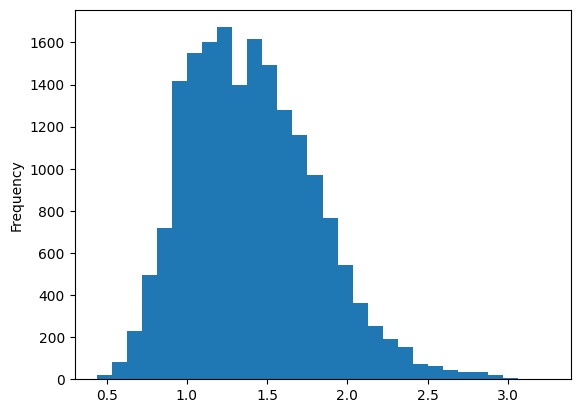

In [12]:
df['AveragePrice'].plot.hist(bins=30)

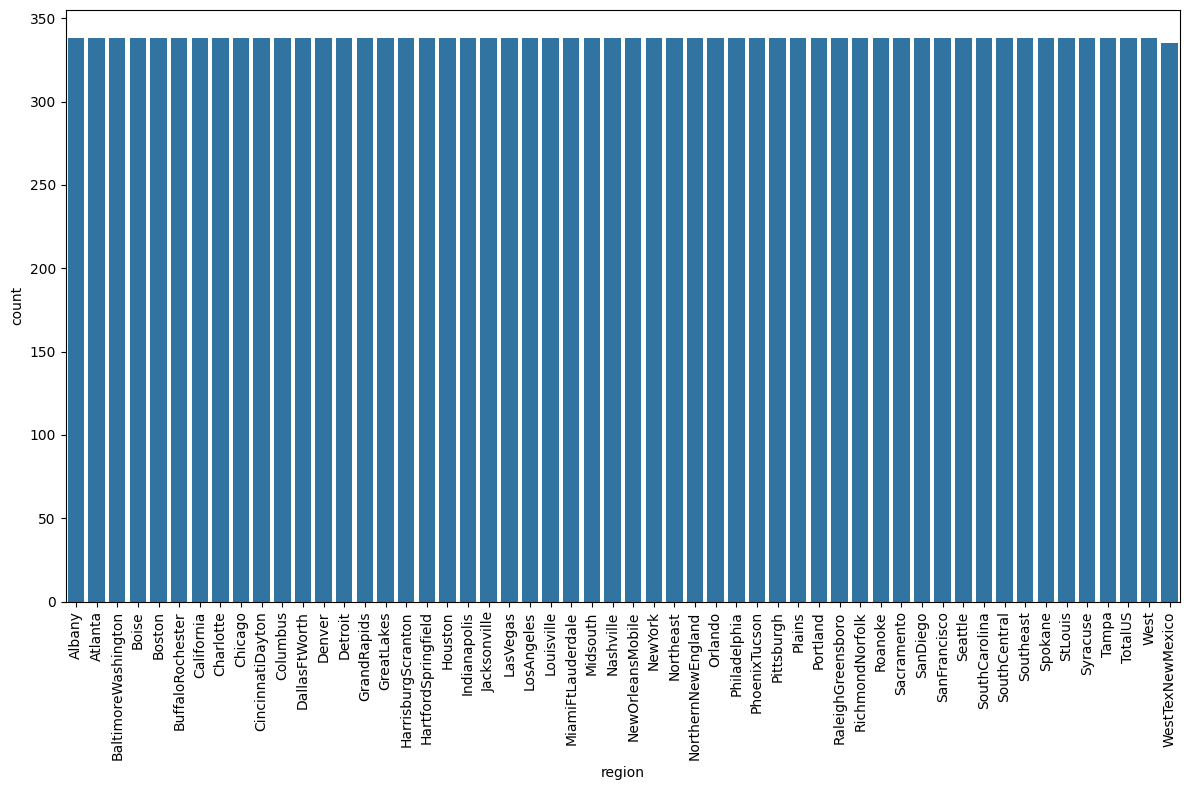

In [13]:
plt.figure(figsize=(12,8))
sns.countplot(data=df, x='region')
plt.xticks(rotation=90)
plt.tight_layout()

In [14]:
df['region'].value_counts()

region
Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago              

In [15]:
df['region'].nunique()

54

In [16]:
#There are almost 338 entries of every region and there are 54 such regions

<Axes: xlabel='type', ylabel='count'>

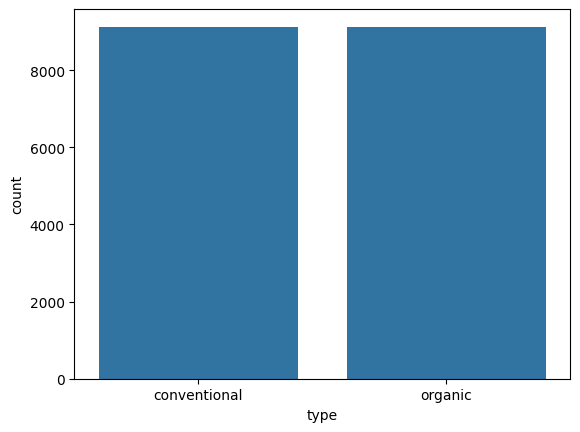

In [17]:
sns.countplot(data=df, x='type')

In [18]:
df['type'].value_counts()

type
conventional    9126
organic         9123
Name: count, dtype: int64

In [19]:
#There are two types of avocado conventional and organic having almost similar number of samples

<Axes: xlabel='Total Volume', ylabel='AveragePrice'>

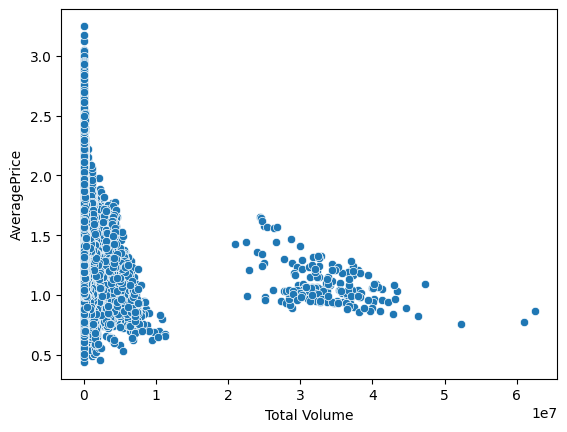

In [20]:
sns.scatterplot(data=df, x='Total Volume', y='AveragePrice')

<Axes: xlabel='Total Volume', ylabel='AveragePrice'>

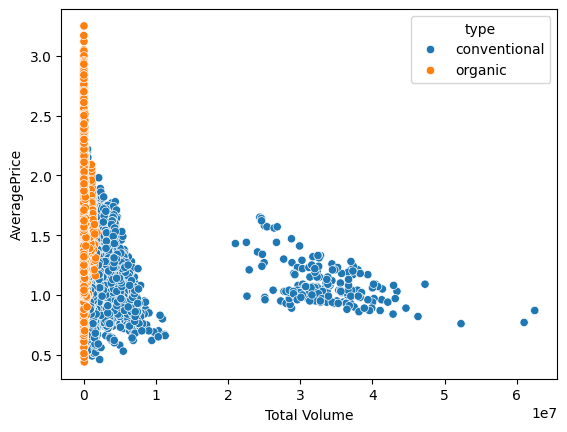

In [21]:
sns.scatterplot(data=df, x='Total Volume', y='AveragePrice', hue='type')

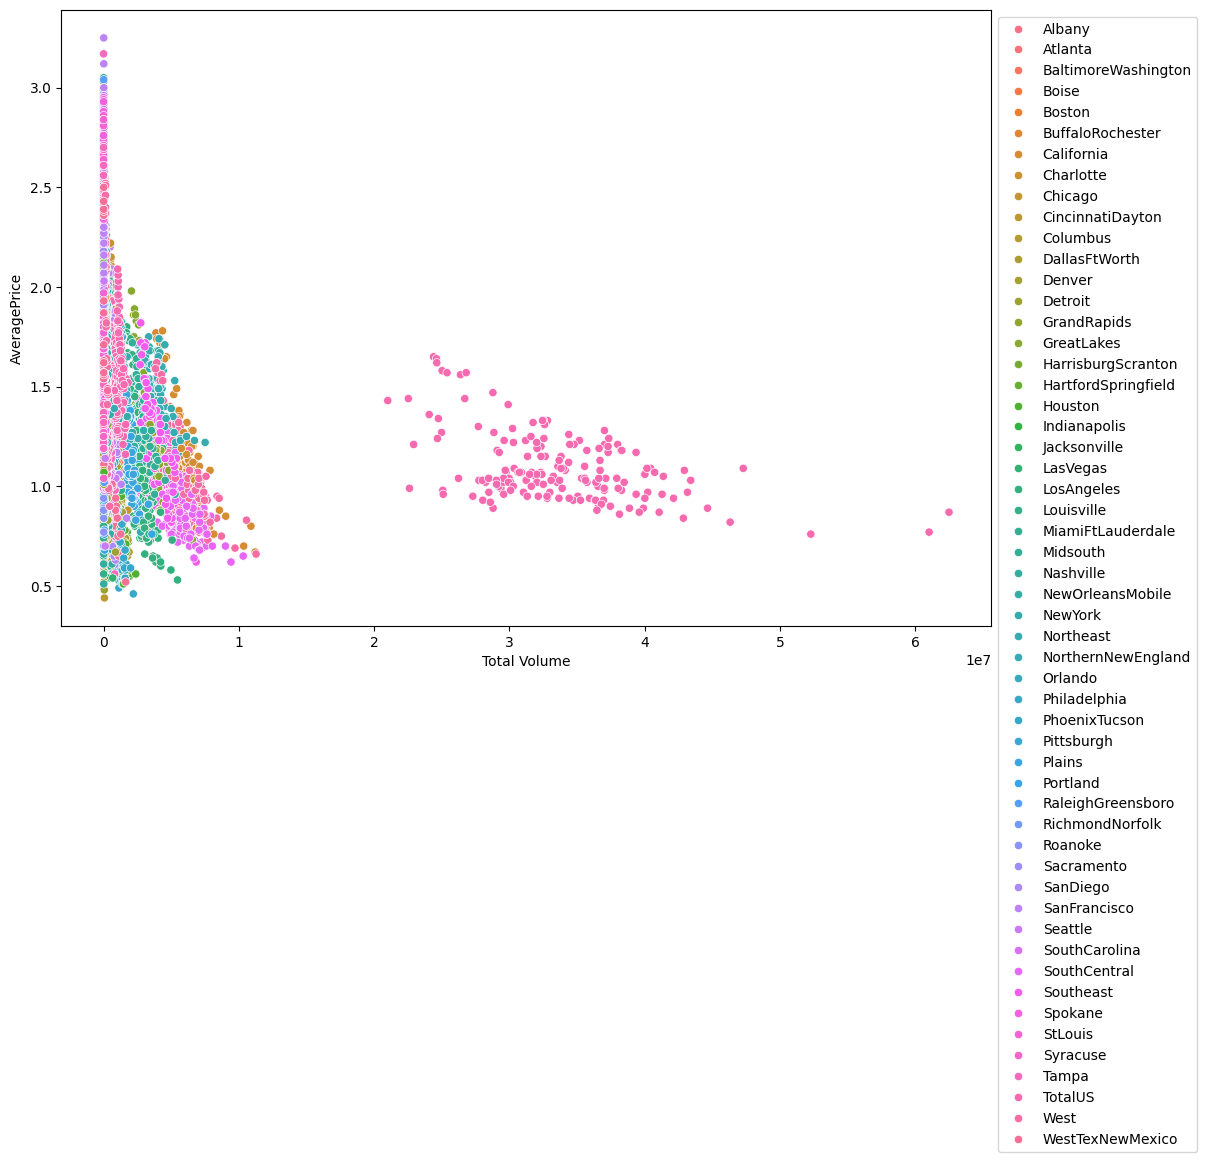

In [22]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x='Total Volume', y='AveragePrice', hue='region')
plt.legend(bbox_to_anchor=[1,1])

<Axes: xlabel='Total Volume', ylabel='AveragePrice'>

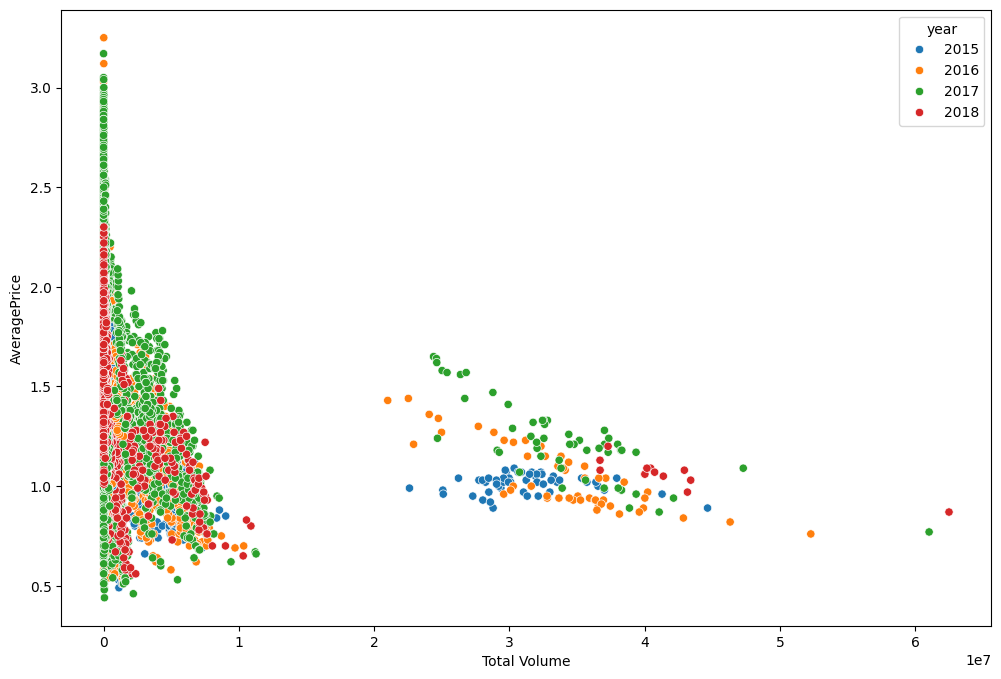

In [23]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x='Total Volume', y='AveragePrice', hue='year',palette='tab10')

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

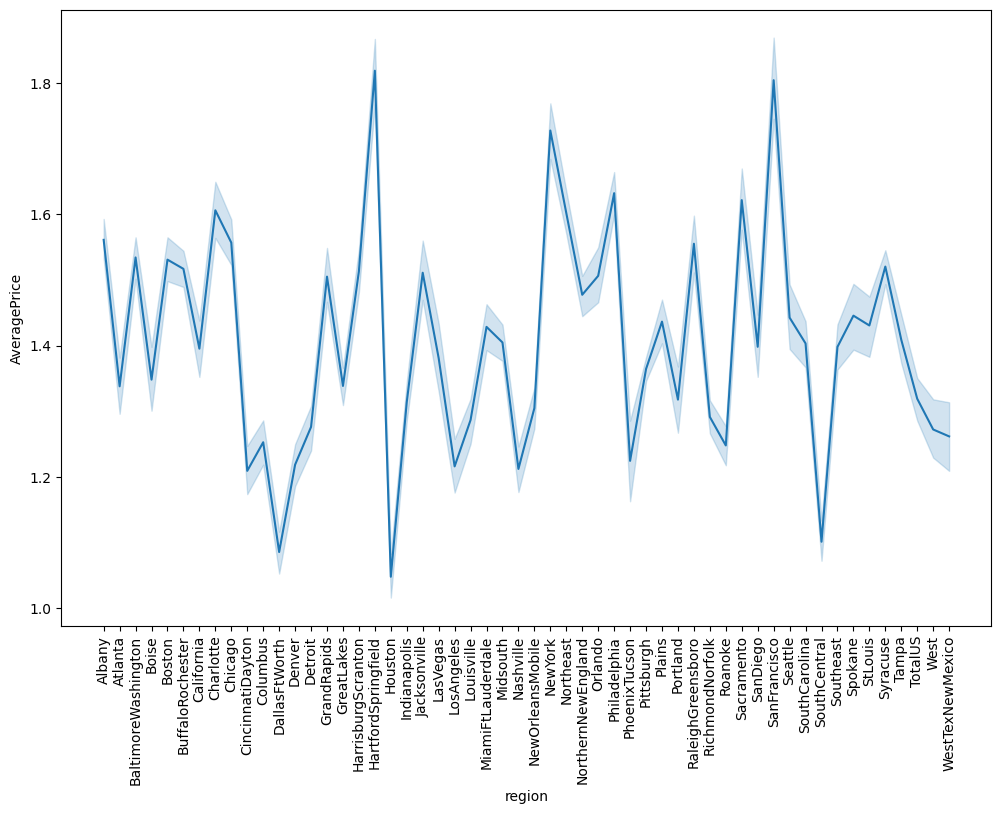

In [24]:
plt.figure(figsize=(12,8))
sns.lineplot(data=df, x='region', y='AveragePrice')
plt.xticks(rotation=90)
plt.tight_layout

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

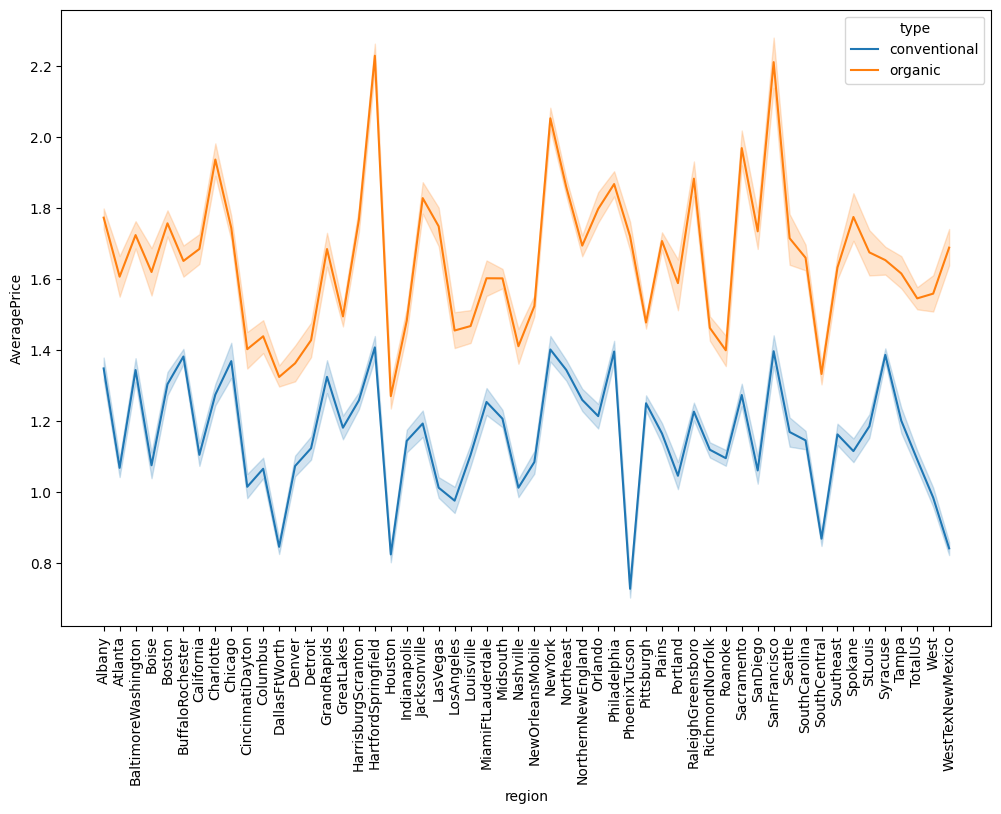

In [25]:
plt.figure(figsize=(12,8))
sns.lineplot(data=df, x='region', y='AveragePrice', hue='type')
plt.xticks(rotation=90)
plt.tight_layout

In [26]:
#DATA PREPROCESSING

In [27]:
#We will drop Unnamed: 0 column as it is only index values 

In [28]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [29]:
#Now we will convert date column from object type to datetime format

In [30]:
df['Date'] = df['Date'].astype('datetime64[ns]')
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  year          18249 non-null  int64         
 12  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 1.8+ MB


In [32]:
#Now we will create two new columns from date column containing month and day values and year is already a column

In [33]:
df['Month'] = df['Date'].apply(lambda x: x.month)
df['Day'] = df['Date'].apply(lambda x: x.day)
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2,4
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1,28
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1,21
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1,14


In [34]:
#DATA VISUALIZATION

/tmp/ipykernel_3898/1808457272.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='year', y='AveragePrice', color='pink', ci=None)


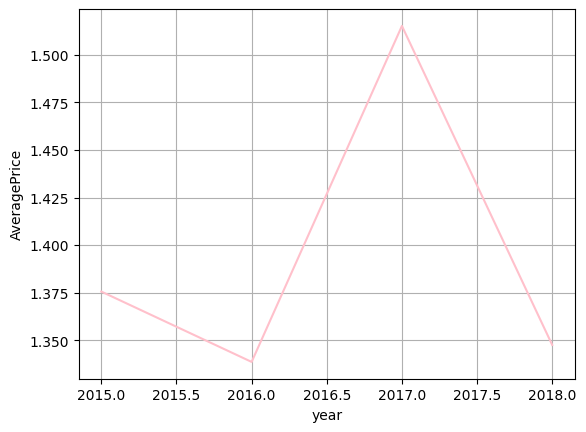

In [35]:
sns.lineplot(data=df, x='year', y='AveragePrice', color='pink', ci=None)
plt.grid()

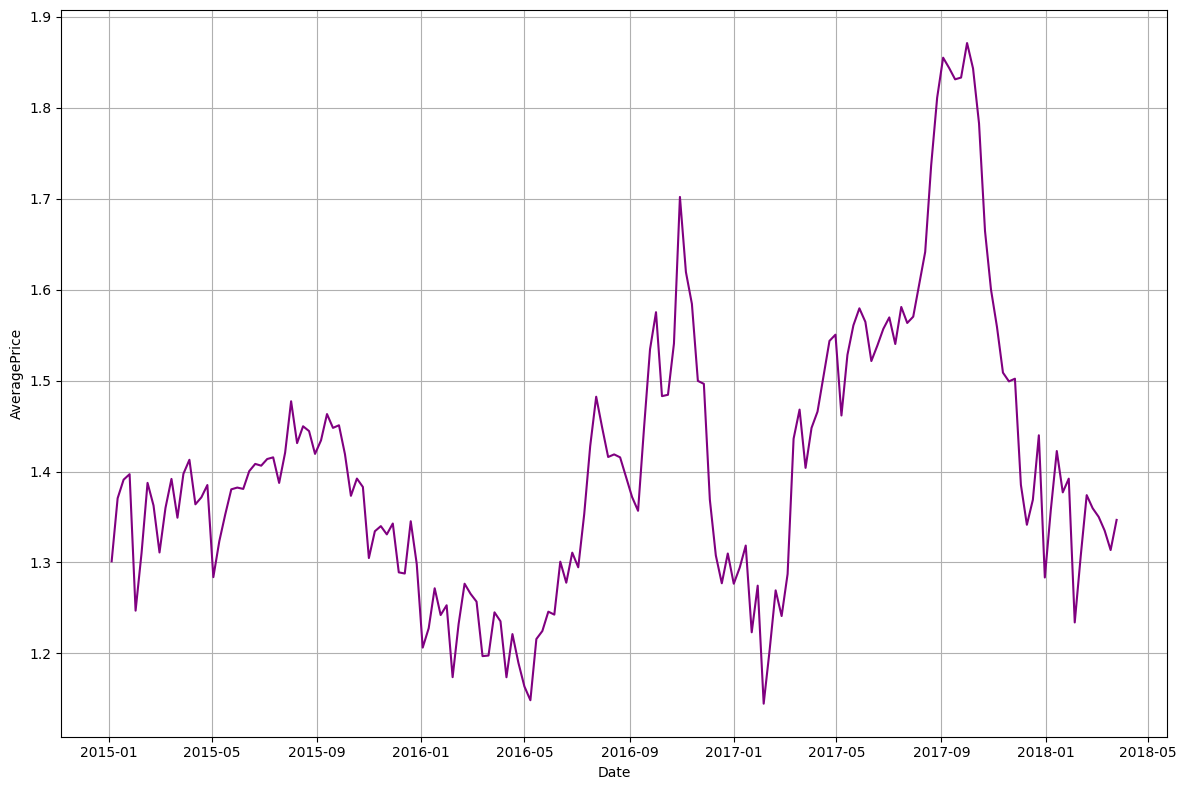

In [36]:
plt.figure(figsize=(12,8))
sns.lineplot(data=df, x='Date', y='AveragePrice', color='purple', errorbar=None)
plt.grid()
plt.tight_layout()

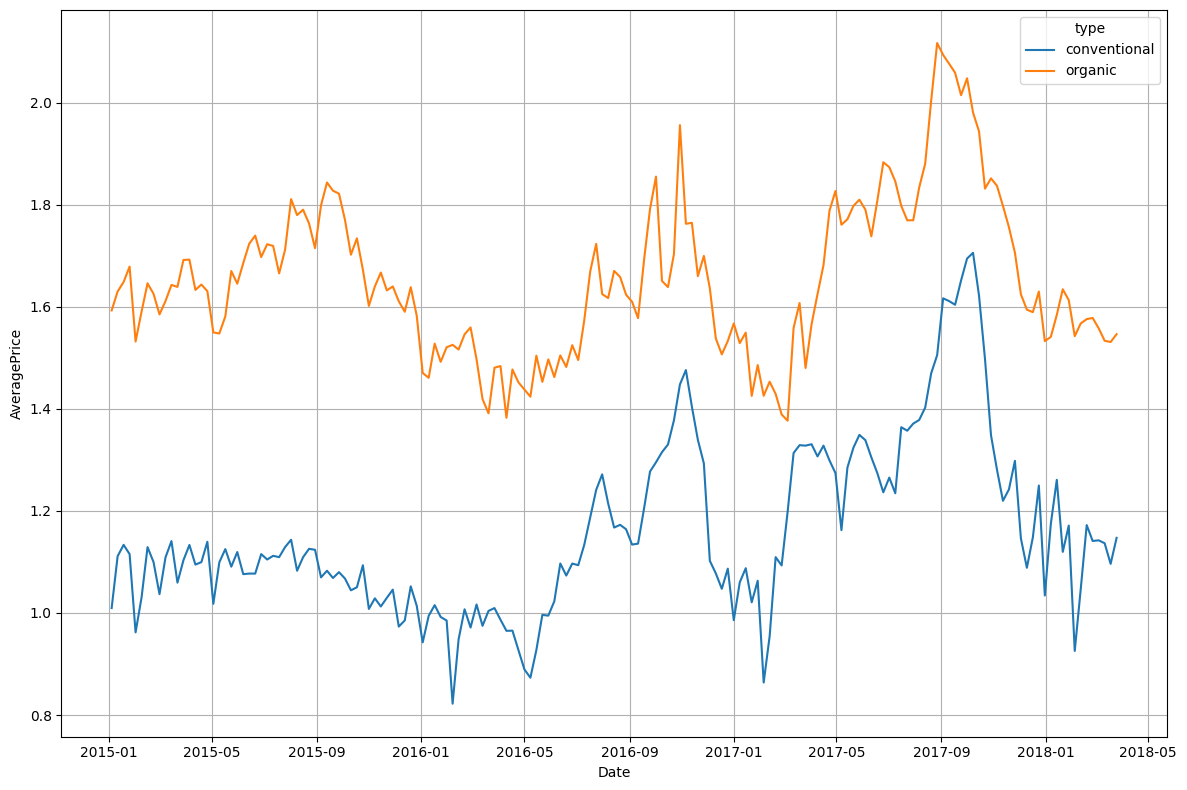

In [37]:
plt.figure(figsize=(12,8))
sns.lineplot(data=df, x='Date', y='AveragePrice', hue='type', errorbar=None)
plt.grid()
plt.tight_layout()

In [38]:
#From the lineplot graph it is clear that the price of avocado skyrockets in the month of September

/tmp/ipykernel_3898/2213119778.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='year', y='AveragePrice', palette='magma')


<Axes: xlabel='year', ylabel='AveragePrice'>

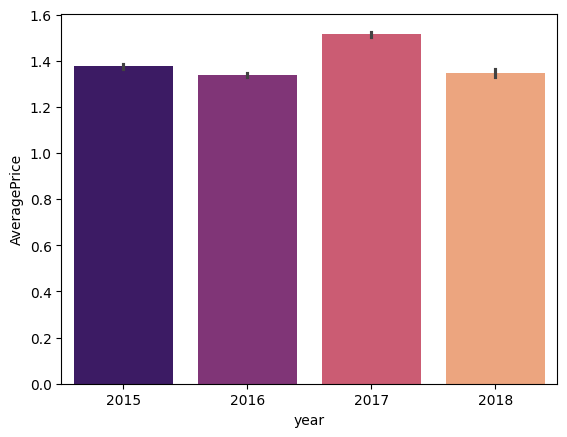

In [39]:
sns.barplot(data=df, x='year', y='AveragePrice', palette='magma')

/tmp/ipykernel_3898/3194887883.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Month', y='AveragePrice', palette='tab10')


<Axes: xlabel='Month', ylabel='AveragePrice'>

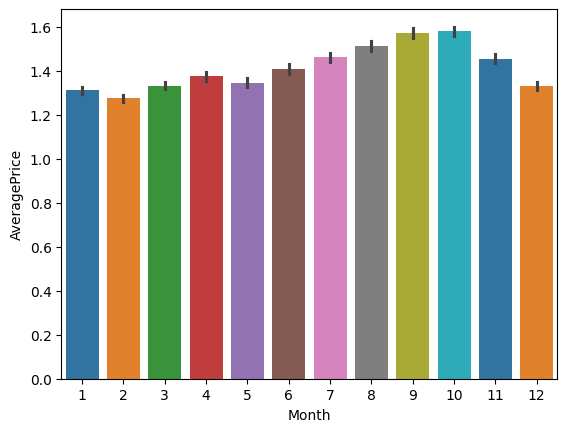

In [40]:
sns.barplot(data=df, x='Month', y='AveragePrice', palette='tab10')

<h3>Above barplots give us average price in a particular year and months</h3>

In [41]:
#Now lets plot histogram of all columns

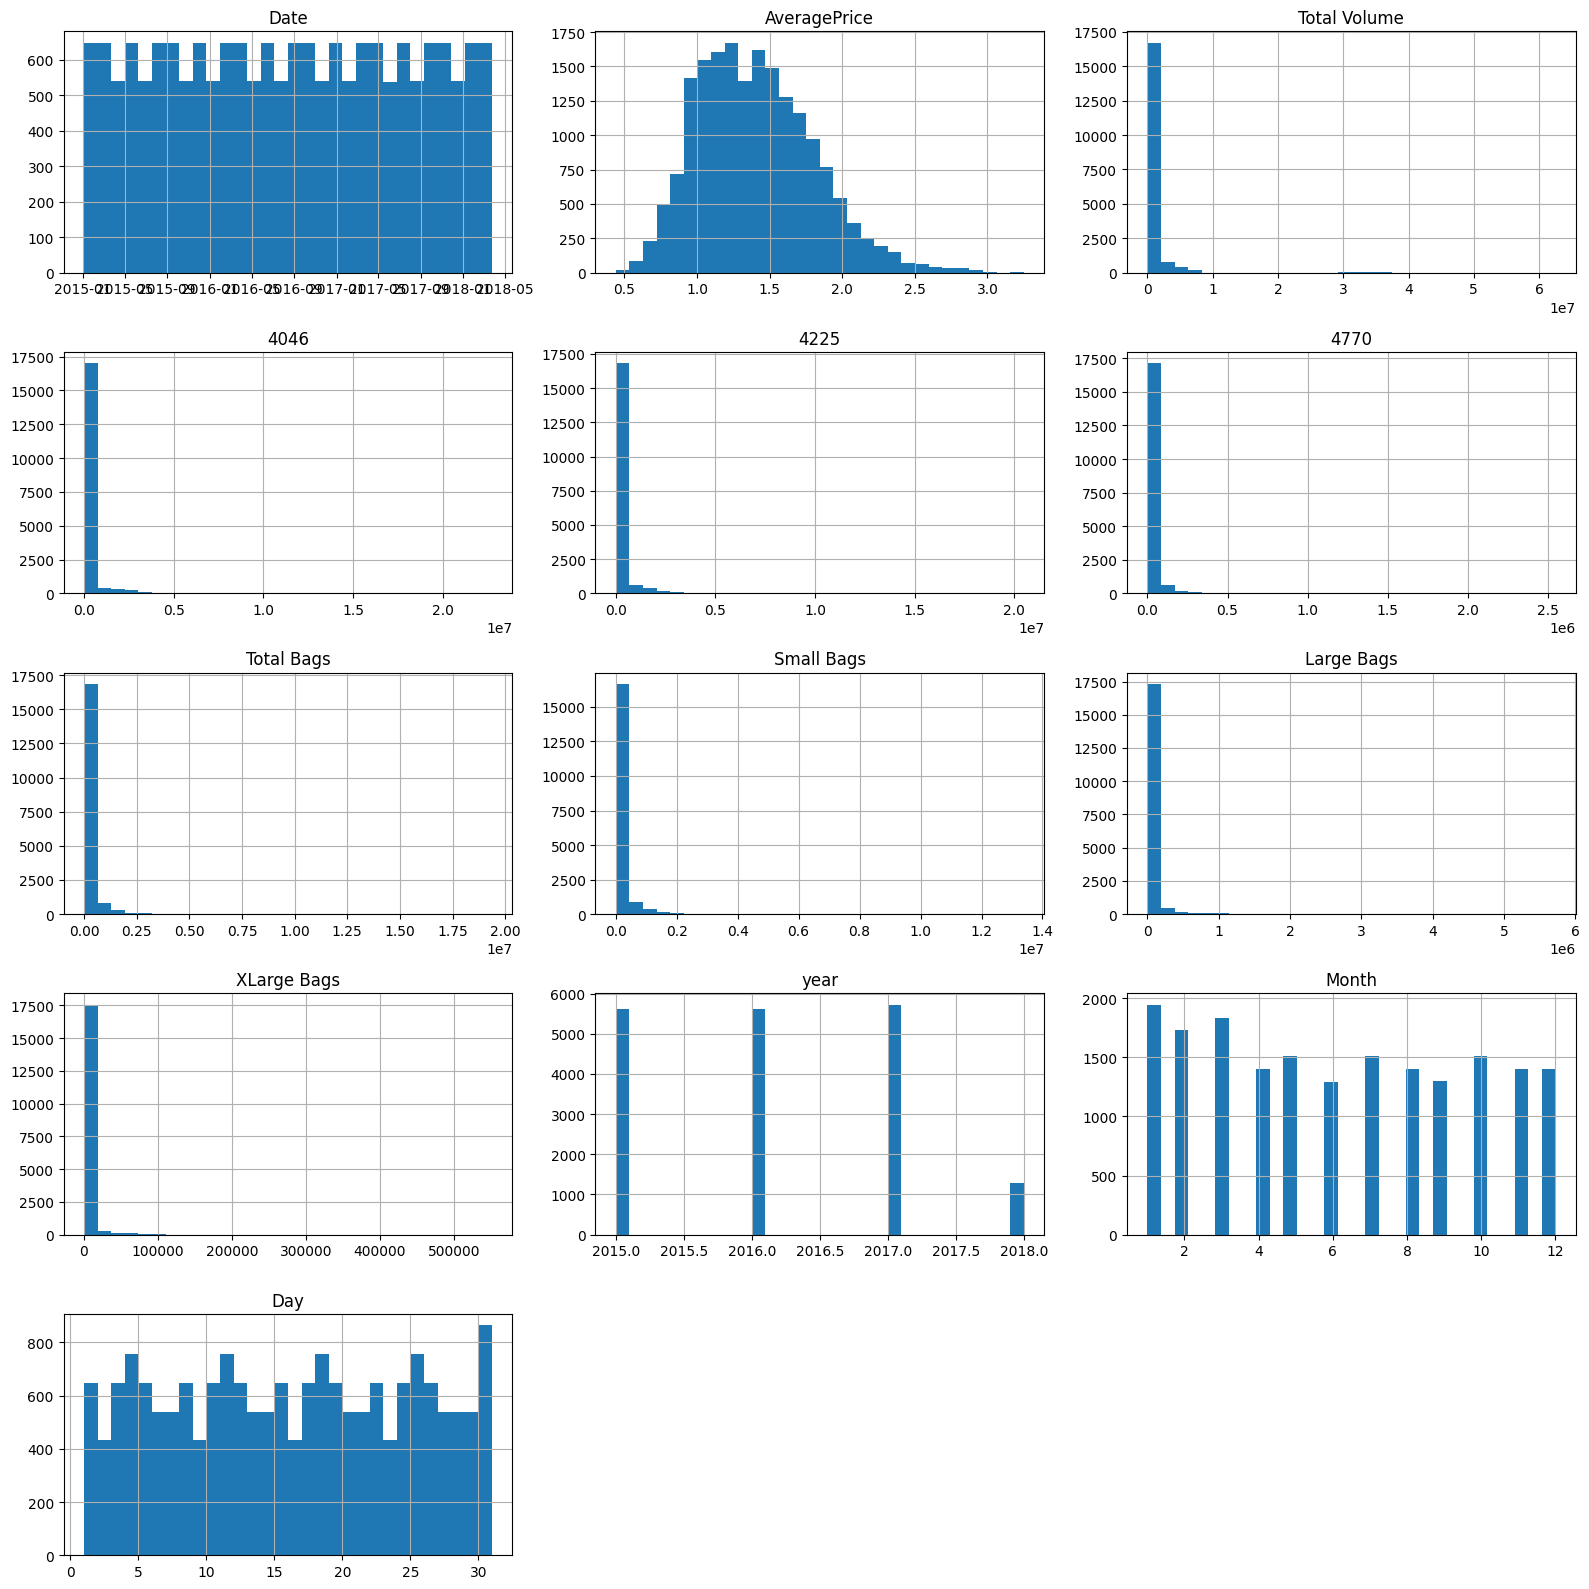

In [42]:
df.hist(figsize=(16,16), layout=(5,3), bins=30)
plt.tight_layout()

<Axes: xlabel='type', ylabel='AveragePrice'>

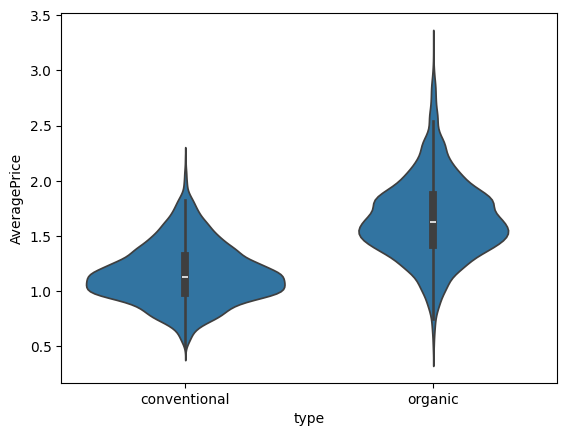

In [46]:
sns.violinplot(data=df, x='type', y='AveragePrice')

<Axes: xlabel='year', ylabel='AveragePrice'>

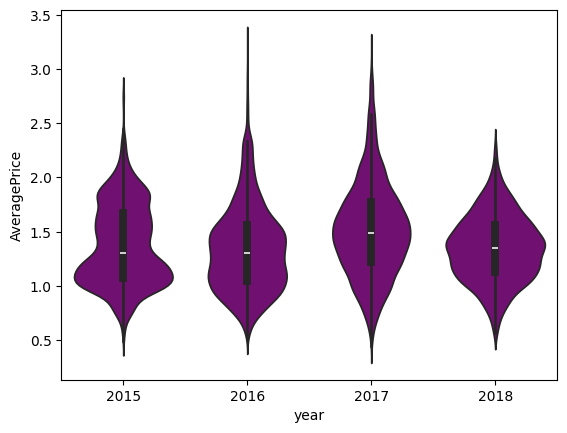

In [48]:
sns.violinplot(data=df, x='year', y='AveragePrice', color='purple')

/tmp/ipykernel_3898/4125748603.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:purple'` for the same effect.

  sns.violinplot(data=df, x='year', y='AveragePrice', hue='type', color='purple')


<Axes: xlabel='year', ylabel='AveragePrice'>

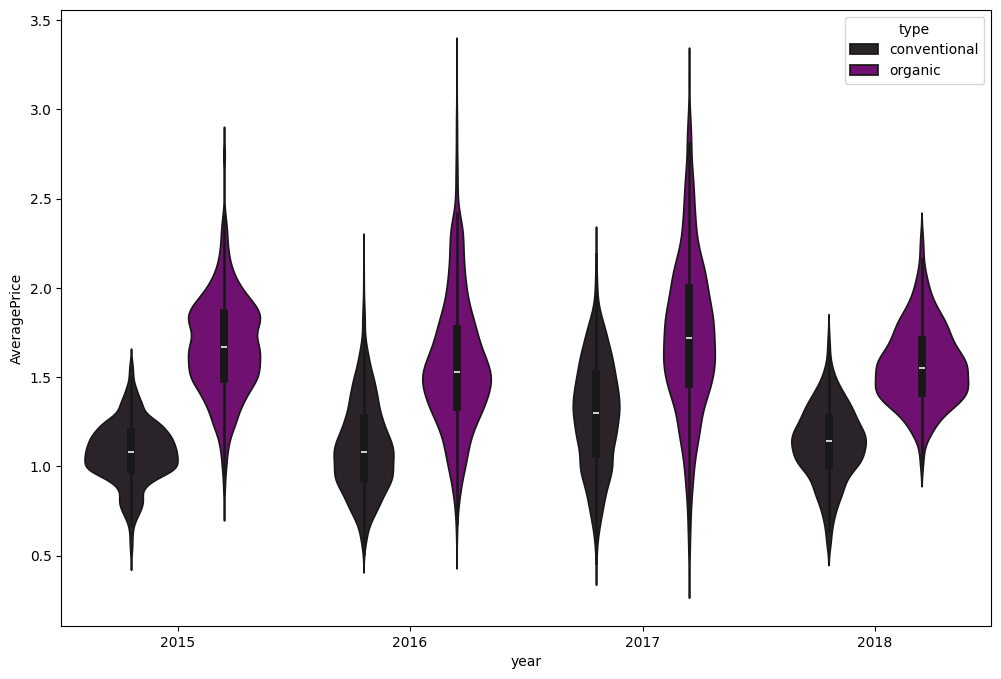

In [50]:
plt.figure(figsize=(12,8))
sns.violinplot(data=df, x='year', y='AveragePrice', hue='type', color='purple')

<Axes: xlabel='type', ylabel='Total Volume'>

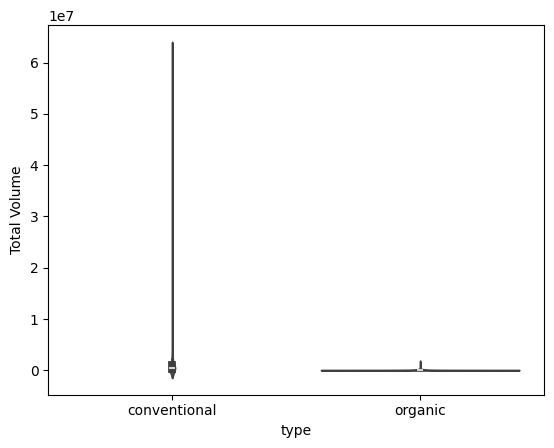

In [51]:
sns.violinplot(data=df, x='type', y='Total Volume')

<h3>Now, let's plot kdeplot to get a proper view of the distribution of data</h3>

In [52]:
df_num = df.drop(['Date','type','region'], axis=1)
df_num

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018,2,4
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018,1,14


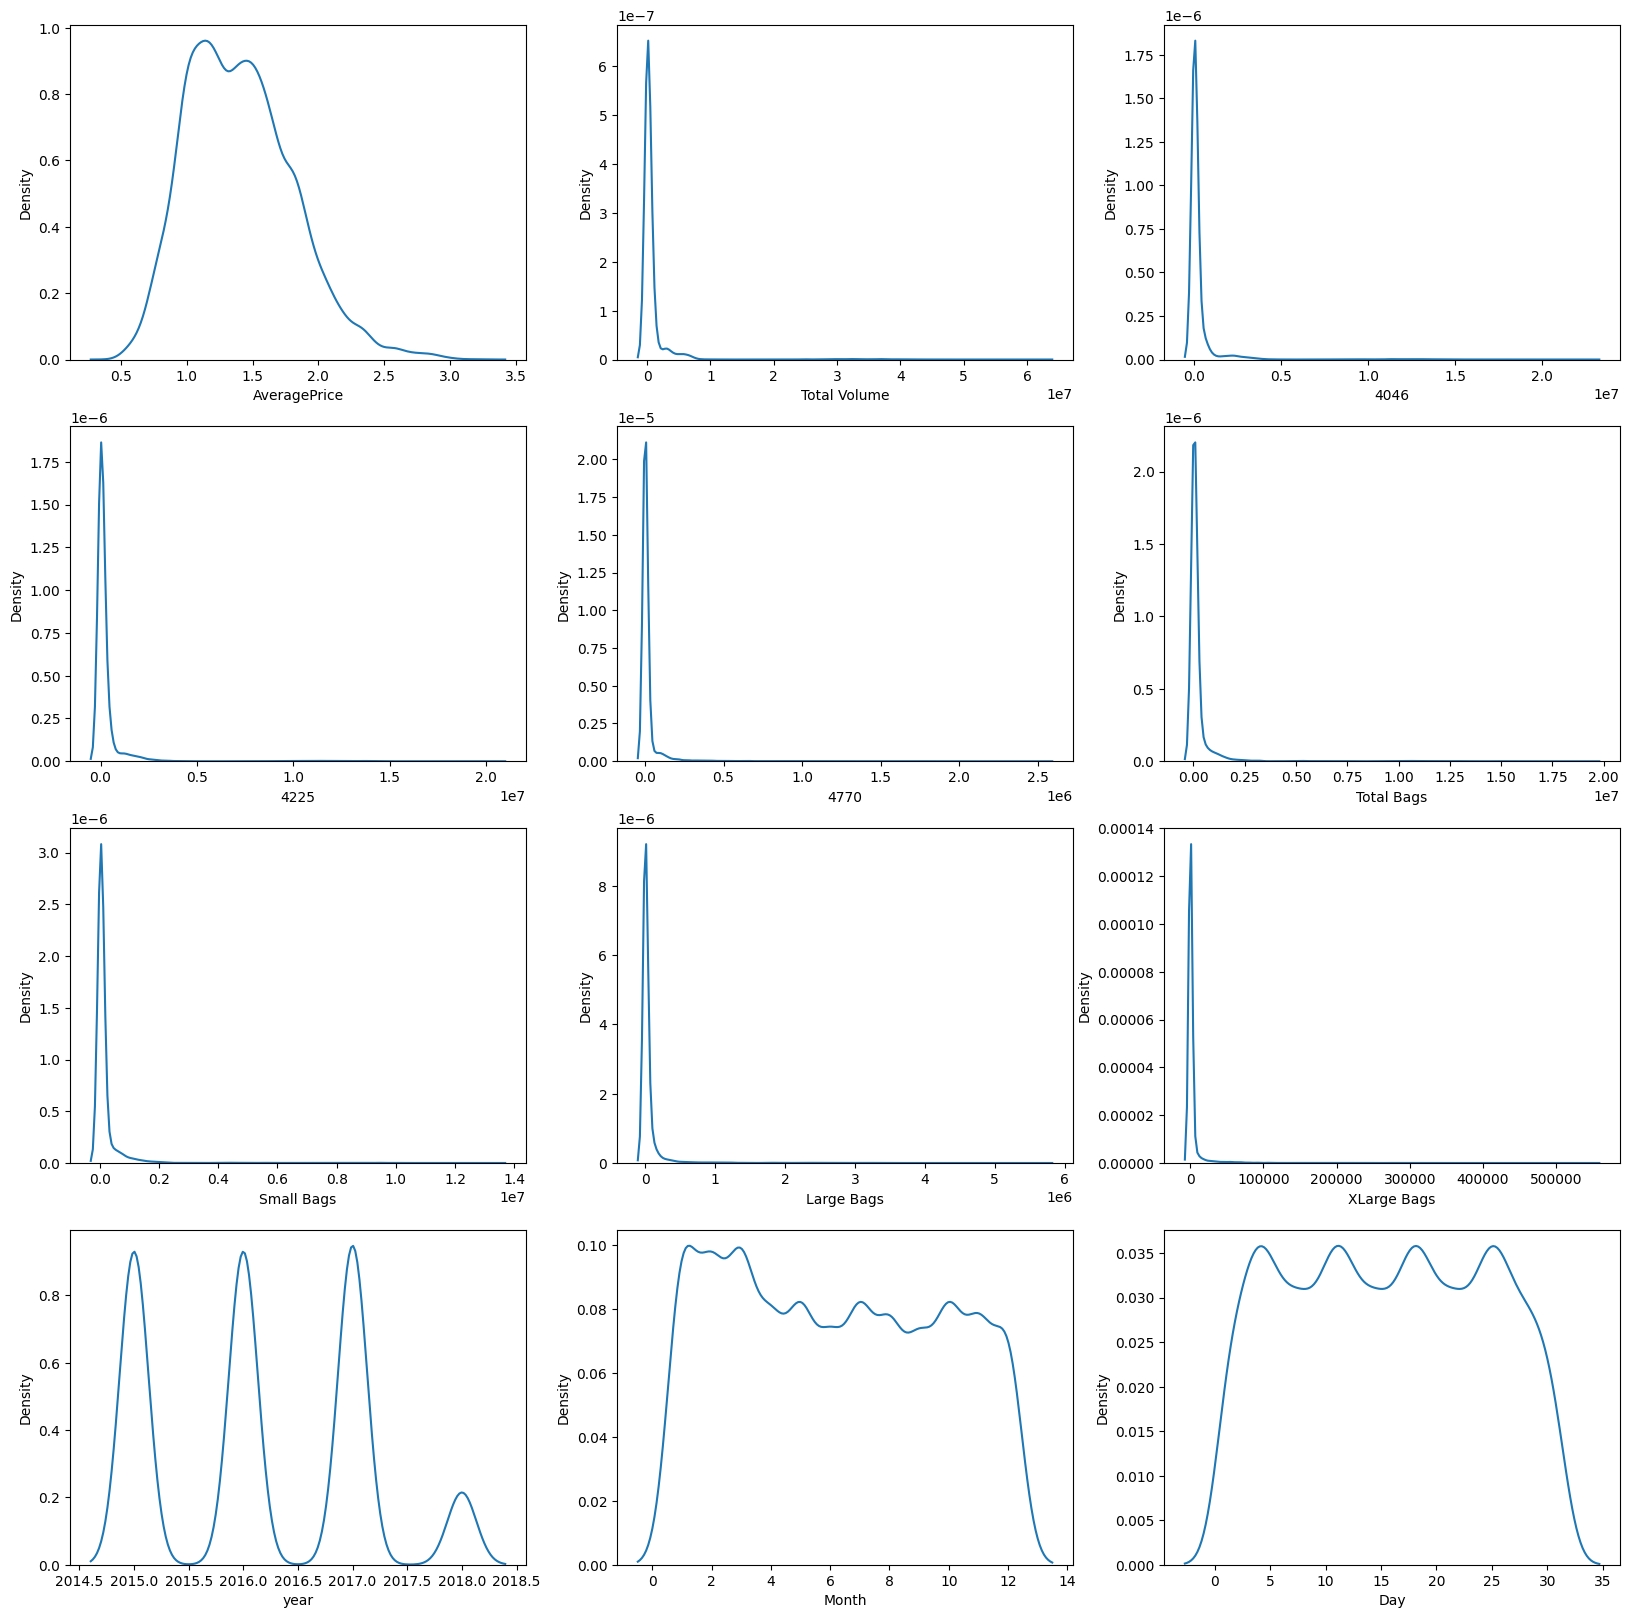

In [53]:
import warnings
warnings.filterwarnings(action='ignore')
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(20,20))
plotnumber = 1
for x in df_num:
    ax = plt.subplot(4,3,plotnumber)
    sns.kdeplot(data=df_num, x=x)
    plotnumber += 1


<h3>Now we will check for outliers present if any using the seaborn boxplot function</h3>

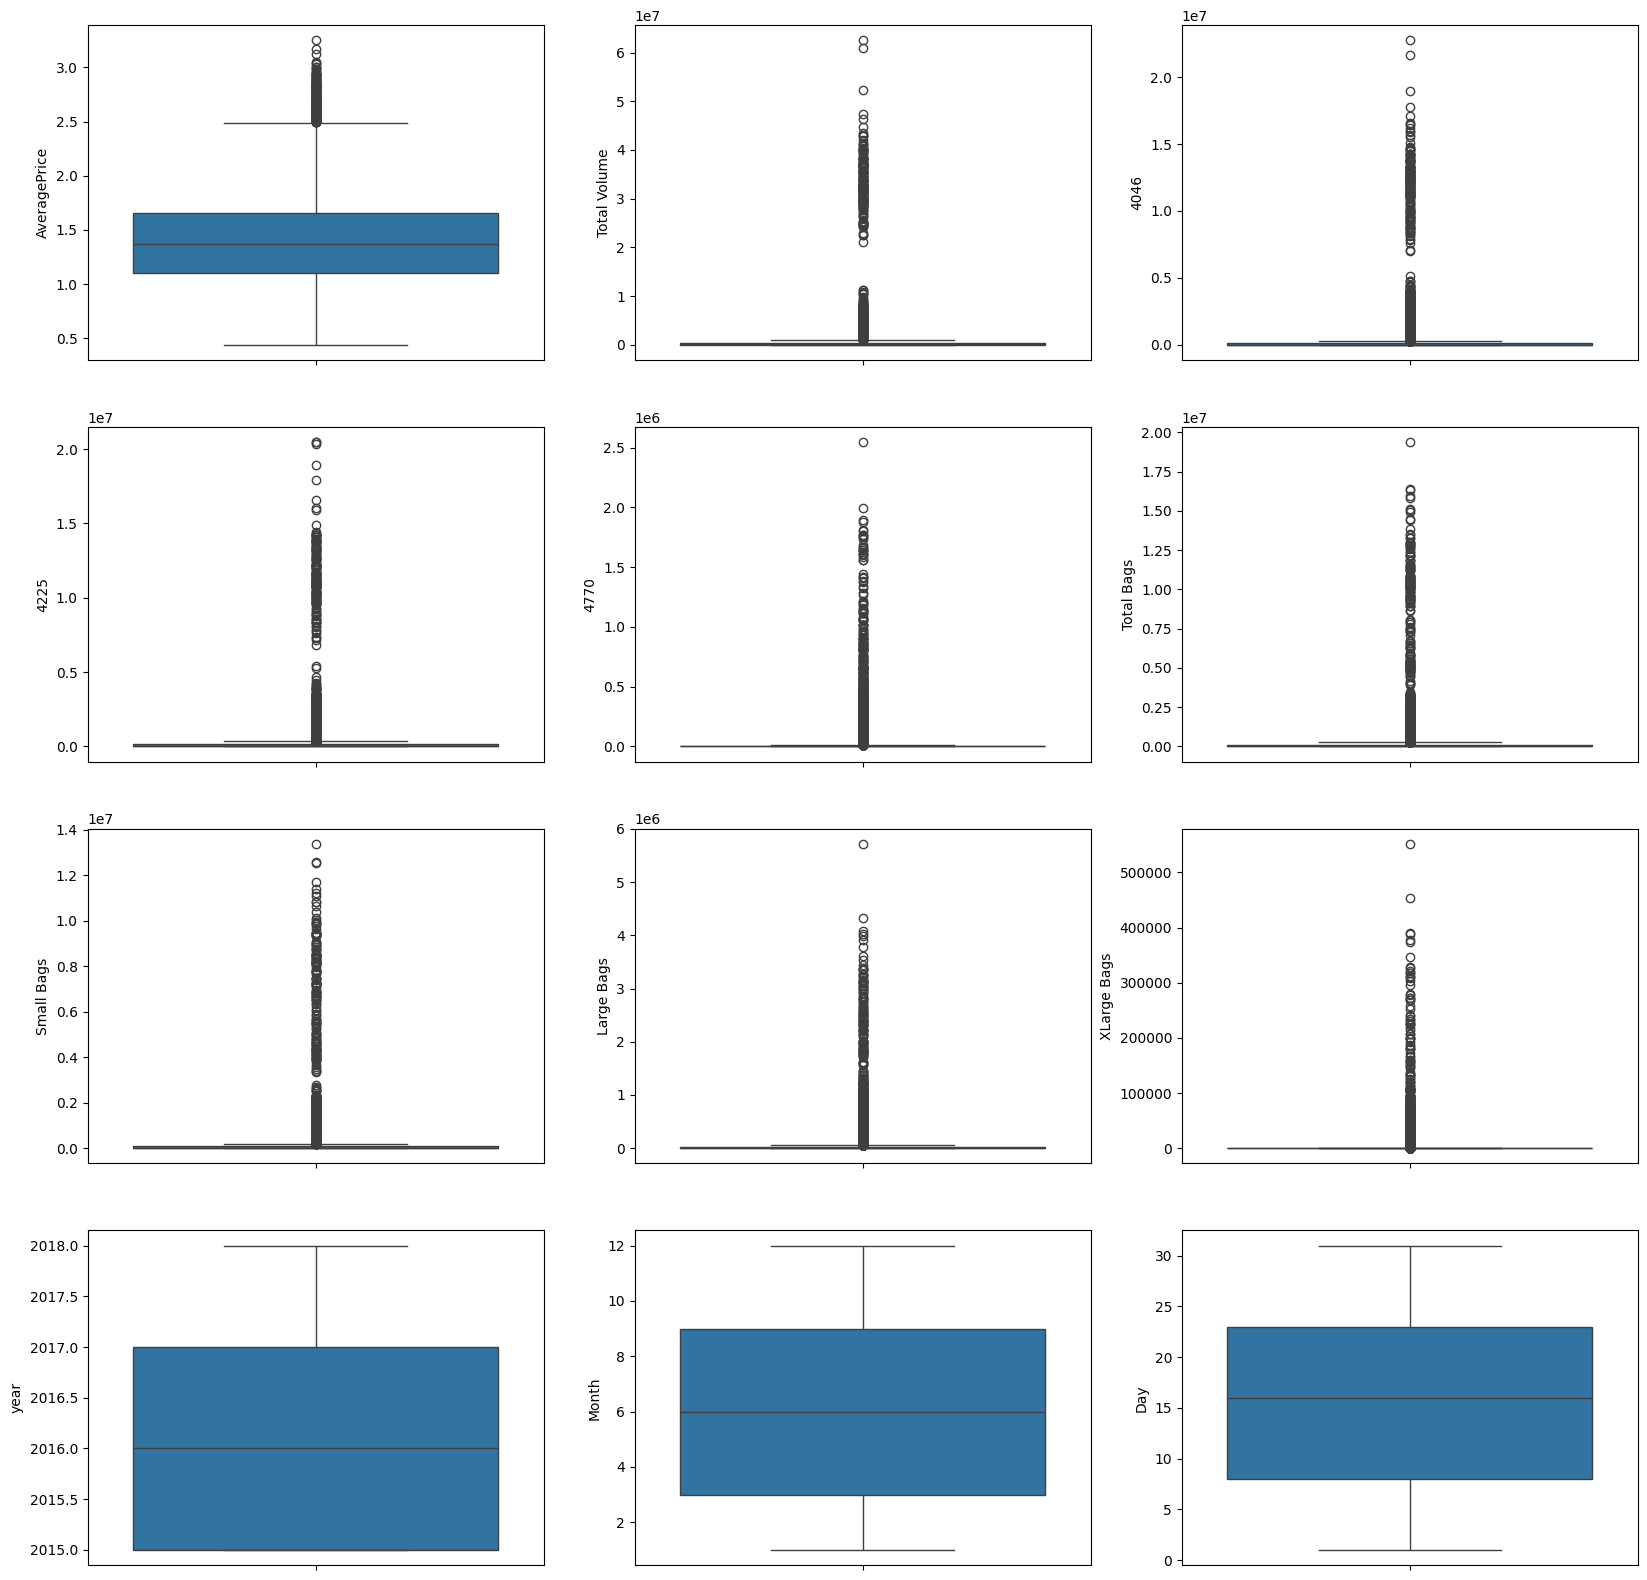

In [54]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(20,20))
plotnumber = 1
for x in df_num:
    ax = plt.subplot(4,3,plotnumber)
    sns.boxplot(data=df_num, y=x)
    plotnumber += 1


In [55]:
#There are outliers present but we will not drop them as it will destroy the dataset

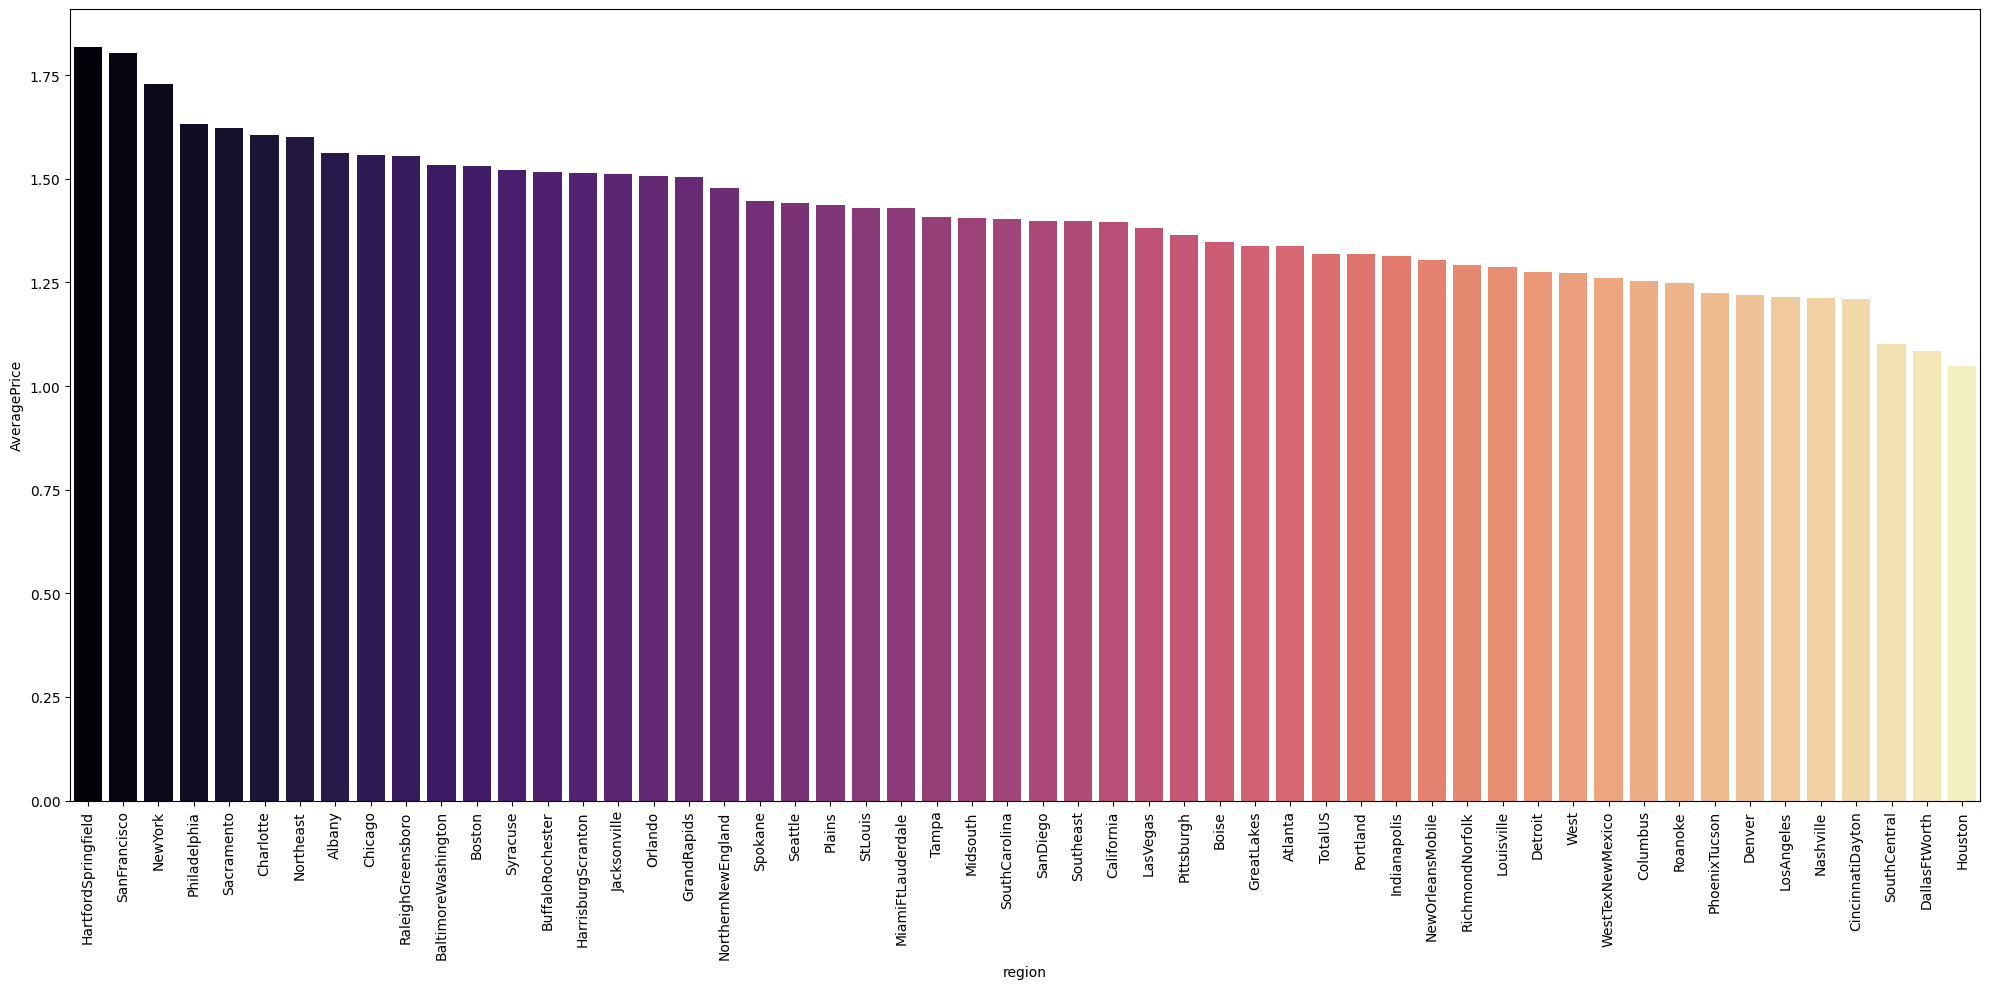

In [56]:
avocado_season = df.groupby(by='region')['AveragePrice'].mean()
avocado_season
plt.figure(figsize=(20,10))
sns.barplot(data=avocado_season.sort_values(ascending=False), palette='magma')
plt.xticks(rotation=90)
plt.tight_layout()

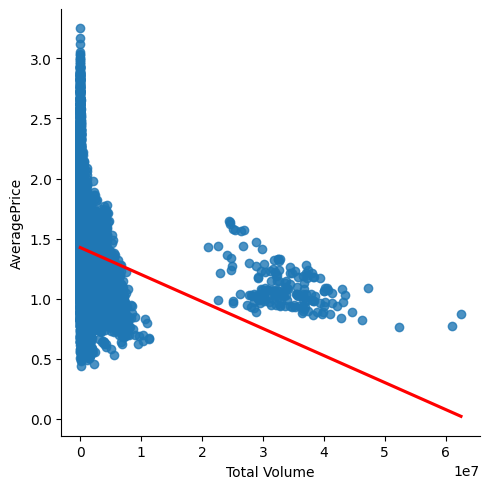

In [57]:
sns.lmplot(data=df, x='Total Volume', y='AveragePrice',ci=None, line_kws={'color':'red'})

<h3>We will check which regions have the highest average volume i.e regions which consume more avocado</h3>

In [58]:
df.groupby(by='region')['Total Volume'].mean()

region
Albany                 4.753787e+04
Atlanta                2.621453e+05
BaltimoreWashington    3.985619e+05
Boise                  4.264257e+04
Boston                 2.877929e+05
BuffaloRochester       6.793630e+04
California             3.044324e+06
Charlotte              1.051939e+05
Chicago                3.955690e+05
CincinnatiDayton       1.317219e+05
Columbus               8.873776e+04
DallasFtWorth          6.166251e+05
Denver                 4.109542e+05
Detroit                1.876403e+05
GrandRapids            8.938383e+04
GreatLakes             1.744505e+06
HarrisburgScranton     1.236948e+05
HartfordSpringfield    1.499128e+05
Houston                6.010884e+05
Indianapolis           8.953666e+04
Jacksonville           8.517753e+04
LasVegas               1.608784e+05
LosAngeles             1.502653e+06
Louisville             4.762427e+04
MiamiFtLauderdale      2.889740e+05
Midsouth               1.503992e+06
Nashville              1.053612e+05
NewOrleansMobile     

In [59]:
#WE WILL DROP THE TOTALUS VALUES AS IT CONTAINS COMBINED STATISTICS 

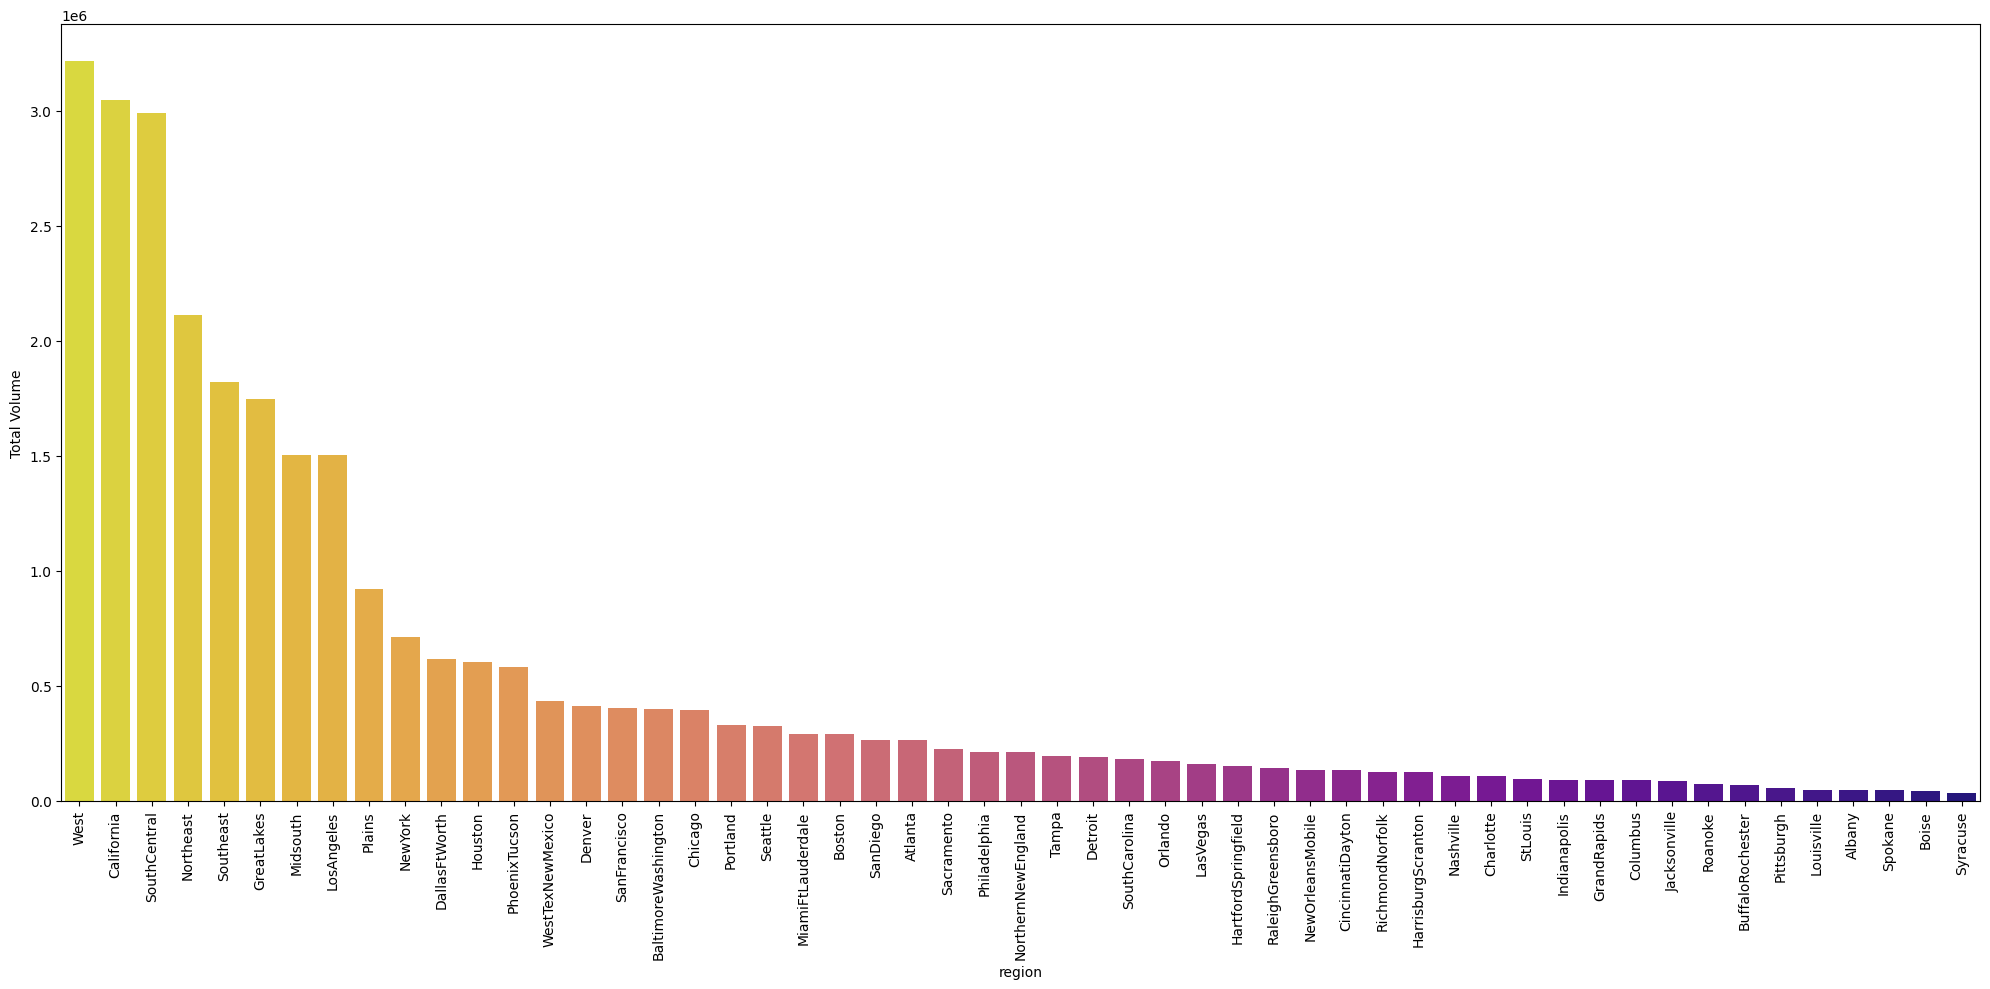

In [60]:
df_reg_avg = df.groupby(by='region')['Total Volume'].mean()
plt.figure(figsize=(20,10))
sns.barplot(data=df_reg_avg.drop('TotalUS').sort_values(ascending=False), palette='plasma_r')
plt.xticks(rotation=90)
plt.tight_layout()

<h3>West, California, SouthCentral, Northeast, Southeast have the highest total volume average avocado consumption</h3>

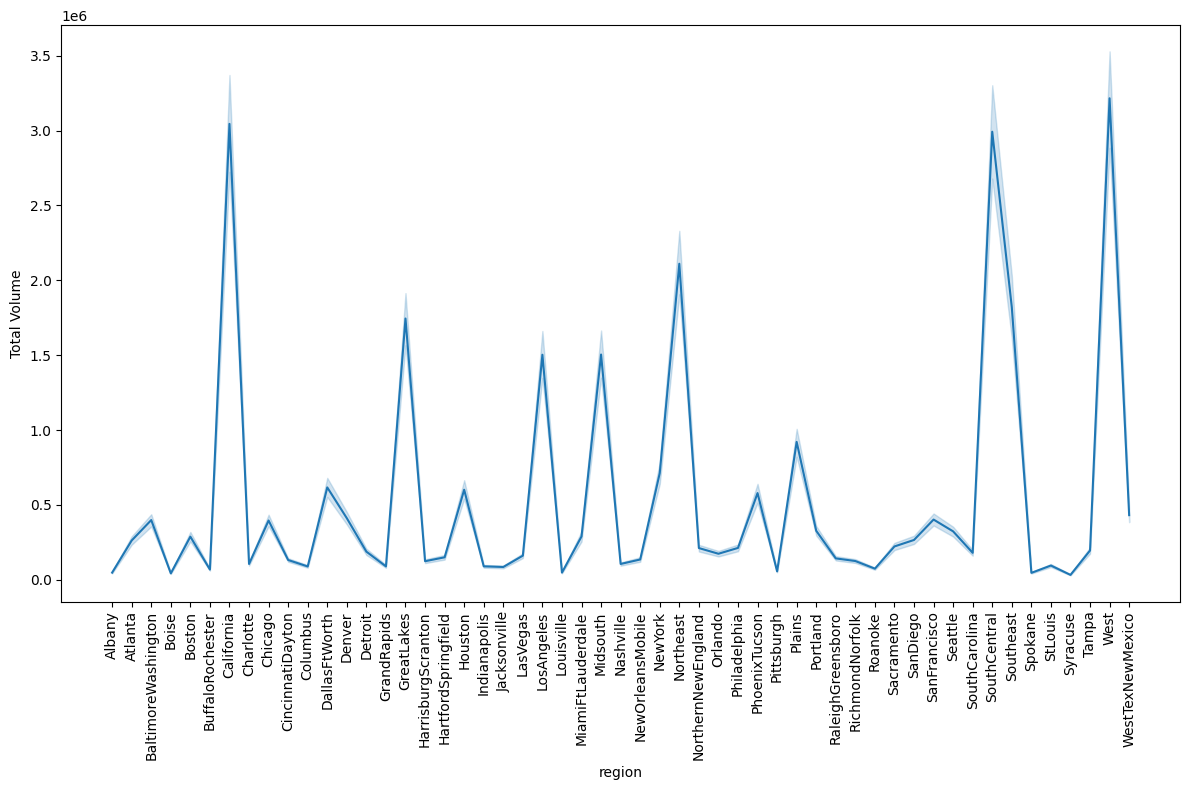

In [61]:
plt.figure(figsize=(12,8))
sns.lineplot(data=df[df['region']!='TotalUS'], x='region', y='Total Volume')
plt.xticks(rotation=90)
plt.tight_layout()

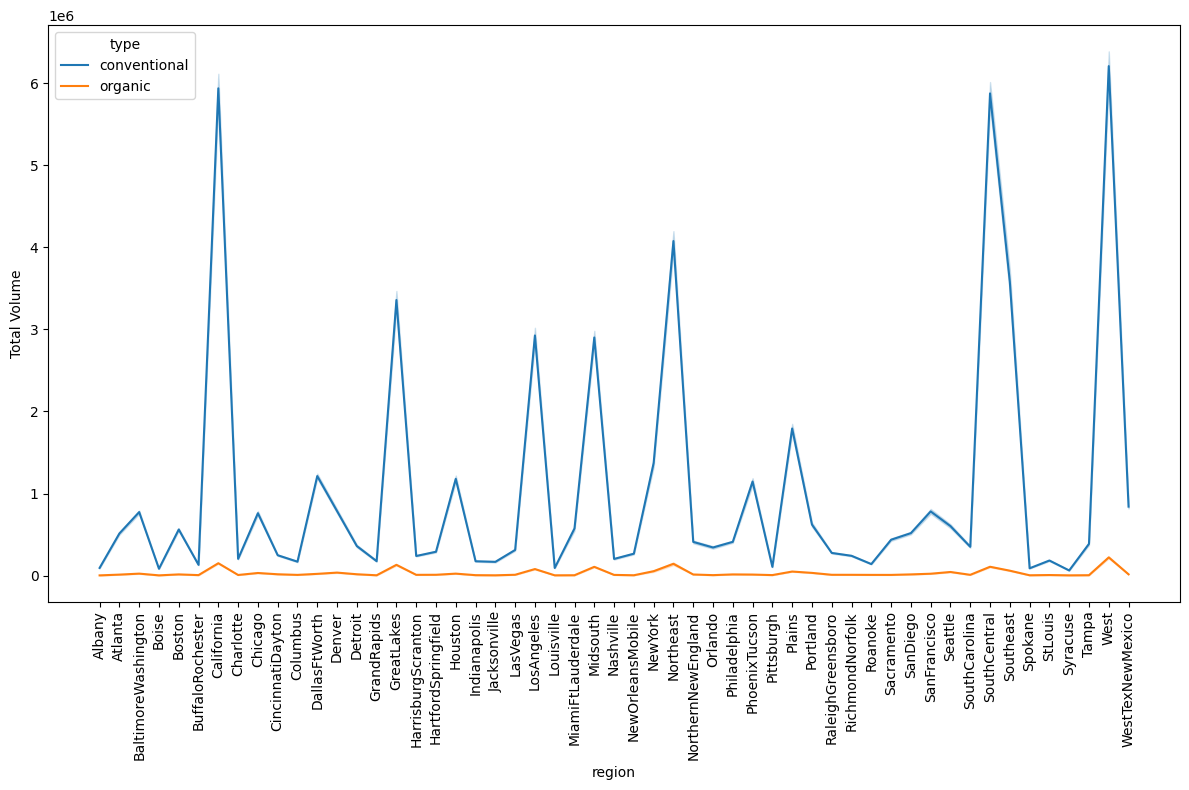

In [62]:
plt.figure(figsize=(12,8))
sns.lineplot(data=df[df['region']!='TotalUS'], x='region', y='Total Volume', hue='type')
plt.xticks(rotation=90)
plt.tight_layout()

<H3>FEATURE ENGINEERING</H3>

<h3>---We will convert type categorical column into numerical column</h3>

In [63]:
df = pd.get_dummies(data=df, columns=['type',], dtype=int, drop_first=True)
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,Month,Day,type_organic
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,Albany,12,27,0
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,Albany,12,20,0
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,Albany,12,13,0
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,Albany,12,6,0
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,Albany,11,29,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018,WestTexNewMexico,2,4,1
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018,WestTexNewMexico,1,28,1
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018,WestTexNewMexico,1,21,1
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018,WestTexNewMexico,1,14,1


In [64]:
from sklearn.preprocessing import LabelEncoder

In [65]:
enc = LabelEncoder()

In [66]:
region_labels = enc.fit_transform(df['region'])
region_labels

array([ 0,  0,  0, ..., 53, 53, 53])

In [67]:
enc.inverse_transform(region_labels)

array(['Albany', 'Albany', 'Albany', ..., 'WestTexNewMexico',
       'WestTexNewMexico', 'WestTexNewMexico'], dtype=object)

In [68]:
df['Region'] = region_labels
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,Month,Day,type_organic,Region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,Albany,12,27,0,0
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,Albany,12,20,0,0
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,Albany,12,13,0,0
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,Albany,12,6,0,0
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,Albany,11,29,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018,WestTexNewMexico,2,4,1,53
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018,WestTexNewMexico,1,28,1,53
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018,WestTexNewMexico,1,21,1,53
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018,WestTexNewMexico,1,14,1,53


In [69]:
#Lets not delete the region column but we will not use that in training 

In [70]:
#We will drop Date column now as we already have day, month and year columns now

In [71]:
df.drop('Date', axis=1, inplace=True)

In [72]:
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,Month,Day,type_organic,Region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,Albany,12,27,0,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,Albany,12,20,0,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,Albany,12,13,0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,Albany,12,6,0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,Albany,11,29,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018,WestTexNewMexico,2,4,1,53
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018,WestTexNewMexico,1,28,1,53
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018,WestTexNewMexico,1,21,1,53
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018,WestTexNewMexico,1,14,1,53


<h2>CORELATION BETWEEN VARIABLES AND HEATMAP</h2>

In [73]:
df.drop('region', axis=1).corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day,type_organic,Region
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197,0.162409,0.027386,0.615845,-0.011716
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193,-0.024689,-0.009747,-0.232434,0.174176
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353,-0.025803,-0.010159,-0.225819,0.192073
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559,-0.022108,-0.012393,-0.232289,0.145726
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531,-0.033424,-0.009009,-0.210027,0.095252
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552,-0.022724,-0.004988,-0.217788,0.175256
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915,-0.023126,-0.003870,-0.220535,0.164702
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891,-0.020187,-0.008352,-0.193177,0.198768
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033,-0.012969,0.000319,-0.175483,0.082281
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000,-0.177050,0.004475,-0.000032,-0.000055


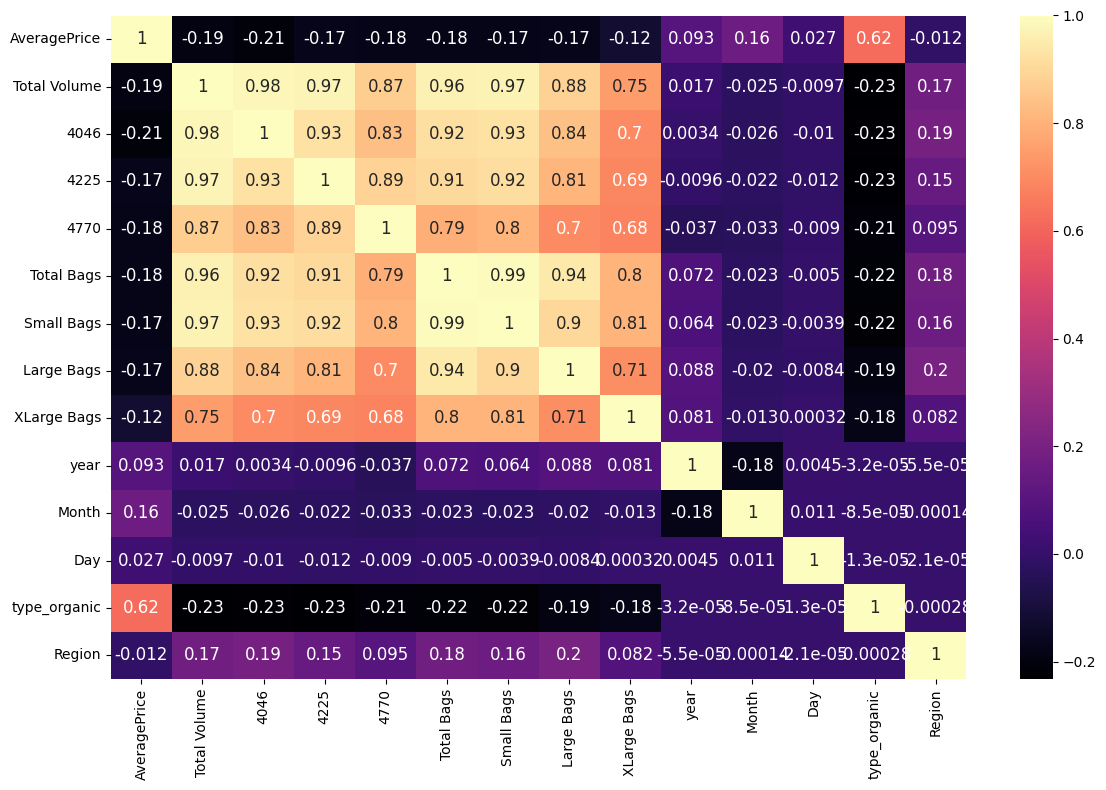

In [74]:
plt.figure(figsize=(12,8))
sns.heatmap(data=df.drop('region', axis=1).corr(), annot=True, cmap='magma',fmt='0.2g',annot_kws={'size':12})
plt.tight_layout()

In [377]:
#Below is the old dataframe corelation and heatmap

In [321]:
df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day,type_organic
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197,0.162409,0.027386,0.615845
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193,-0.024689,-0.009747,-0.232434
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353,-0.025803,-0.010159,-0.225819
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559,-0.022108,-0.012393,-0.232289
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531,-0.033424,-0.009009,-0.210027
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552,-0.022724,-0.004988,-0.217788
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915,-0.023126,-0.003870,-0.220535
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891,-0.020187,-0.008352,-0.193177
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033,-0.012969,0.000319,-0.175483
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000,-0.177050,0.004475,-0.000032


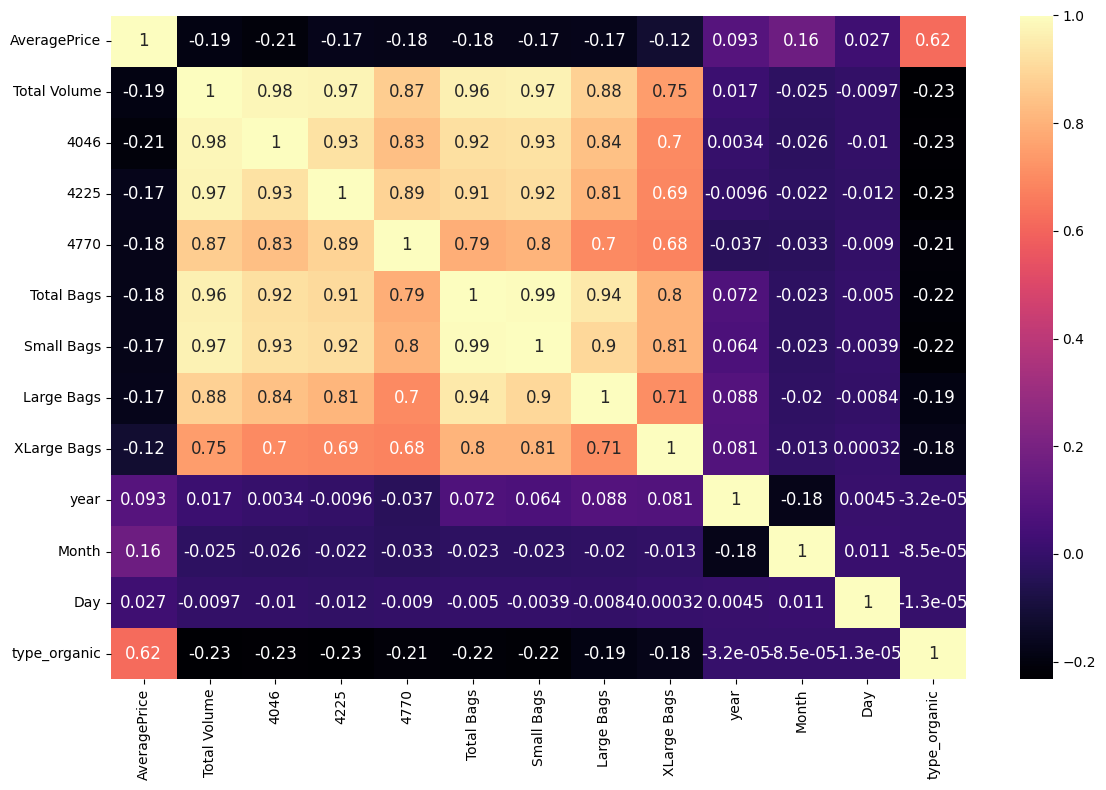

In [322]:
plt.figure(figsize=(12,8))
sns.heatmap(data=df.corr(), annot=True, cmap='magma',fmt='0.2g',annot_kws={'size':12})
plt.tight_layout()

In [125]:
#None of the columns have a very high co-relation with Region column

<h2>DATA PREPROCESSING</h2>

<h3>Import train test split to split the data into training set and testing set</h3>

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X = df.drop(['Region', 'region'], axis=1)
y = df['Region']

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
X_train.shape
X_train

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day,type_organic
16391,1.88,5376.58,147.41,871.40,0.00,4357.77,4351.10,6.67,0.00,2017,11,12,1
4990,0.81,578610.94,155537.61,153030.46,21523.37,248519.50,144796.06,103723.44,0.00,2016,1,10,0
13653,2.01,6470.08,2026.07,2529.20,0.00,1914.81,1848.75,66.06,0.00,2016,11,27,1
2074,1.02,145648.40,78195.76,38763.75,134.25,28554.64,25981.67,2572.97,0.00,2015,2,8,0
12377,1.53,40535.05,162.25,38677.24,0.00,1695.56,1695.56,0.00,0.00,2016,6,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,1.55,12946.65,2398.15,10206.13,0.00,342.37,342.37,0.00,0.00,2015,6,28,1
11964,1.55,1193.06,26.72,346.19,0.00,820.15,820.15,0.00,0.00,2016,5,22,1
5390,1.31,83407.69,992.24,54950.48,769.07,26695.90,26695.90,0.00,0.00,2016,5,1,0
860,1.13,277578.88,42766.16,140403.76,2028.31,92380.65,87952.58,2821.41,1606.66,2015,6,14,0


In [79]:
X_test.shape
X_test

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day,type_organic
8604,0.82,218329.70,79239.58,26356.05,2998.74,109735.33,73393.34,34338.97,2003.02,2018,2,11,0
2608,0.97,391514.43,228324.13,72749.38,100.62,90340.30,44449.47,45890.83,0.00,2015,11,1,0
14581,1.44,3907.40,1147.09,39.51,0.00,2720.80,2717.47,3.33,0.00,2016,1,24,1
4254,0.97,267953.78,150786.30,27025.48,565.65,89576.35,74664.71,14911.64,0.00,2016,3,6,0
16588,1.45,8805.28,828.39,3.24,0.00,7973.65,7456.43,517.22,0.00,2017,2,19,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15956,1.27,77418.61,10912.94,21788.20,3.12,44714.35,41824.67,2889.68,0.00,2017,1,22,1
12471,1.67,7223.46,629.11,4017.95,0.00,2576.40,1129.77,1446.63,0.00,2016,8,21,1
4574,0.59,1276128.92,868817.82,252752.29,12047.67,142511.14,91807.54,50703.60,0.00,2016,1,10,0
16359,1.92,20003.65,14.31,370.78,0.00,19618.56,19618.56,0.00,0.00,2017,6,18,1


In [80]:
y_train

16391    31
4990     41
13653    33
2074     39
12377     8
         ..
11284    41
11964     0
5390     49
860      16
15795    19
Name: Region, Length: 14599, dtype: int64

In [81]:
y_test

8604     10
2608     50
14581    50
4254     27
16588    34
         ..
15956    22
12471    10
4574     33
16359    30
16249    28
Name: Region, Length: 3650, dtype: int64

<h2>SCALING THE DATA USING STANDARD SCALER</h2>

In [82]:
from sklearn.preprocessing import StandardScaler

In [83]:
scaler = StandardScaler()

In [84]:
X_train=pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_train

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day,type_organic
0,1.178674,-0.247683,-0.235928,-0.245519,-0.211662,-0.241649,-0.241658,-0.224957,-0.177018,0.905234,1.360639,-0.415019,1.000891
1,-1.475662,-0.079312,-0.110923,-0.118244,-0.011670,0.010839,-0.049399,0.206852,-0.177018,-0.158217,-1.471649,-0.642903,-0.999110
2,1.501164,-0.247362,-0.234417,-0.244132,-0.211662,-0.244176,-0.245084,-0.224710,-0.177018,-0.158217,1.360639,1.294109,1.000891
3,-0.954717,-0.206482,-0.173141,-0.213823,-0.210415,-0.216627,-0.212047,-0.214273,-0.177018,-1.221669,-1.188420,-0.870786,-0.999110
4,0.310433,-0.237356,-0.235916,-0.213896,-0.211662,-0.244402,-0.245293,-0.224985,-0.177018,-0.158217,-0.055505,-0.415019,1.000891
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14594,0.360047,-0.245460,-0.234117,-0.237710,-0.211662,-0.245802,-0.247146,-0.224985,-0.177018,-1.221669,-0.055505,1.408051,1.000891
14595,0.360047,-0.248912,-0.236025,-0.245958,-0.211662,-0.245308,-0.246492,-0.224985,-0.177018,-0.158217,-0.338734,0.724400,1.000891
14596,-0.235318,-0.224764,-0.235248,-0.200284,-0.204516,-0.218549,-0.211070,-0.224985,-0.177018,-0.158217,-0.338734,-1.668380,-0.999110
14597,-0.681842,-0.167732,-0.201643,-0.128806,-0.192815,-0.150624,-0.127213,-0.213238,-0.085766,-1.221669,-0.055505,-0.187135,-0.999110


In [85]:
X_test=pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
X_test

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day,type_organic
0,-1.450855,-0.185134,-0.172302,-0.224202,-0.183798,-0.132678,-0.147144,-0.082020,-0.063254,1.968686,-1.188420,-0.528961,-0.999110
1,-1.078752,-0.134266,-0.052370,-0.185396,-0.210727,-0.152734,-0.186766,-0.033925,-0.177018,-1.221669,1.360639,-1.668380,-0.999110
2,0.087172,-0.248115,-0.235124,-0.246214,-0.211662,-0.243342,-0.243894,-0.224971,-0.177018,-0.158217,-1.471649,0.952284,1.000891
3,-1.078752,-0.170559,-0.114746,-0.223642,-0.206406,-0.153524,-0.145404,-0.162902,-0.177018,-0.158217,-0.905191,-1.098670,-0.999110
4,0.111978,-0.246676,-0.235380,-0.246245,-0.211662,-0.237910,-0.237407,-0.222831,-0.177018,0.905234,-1.188420,0.382574,1.000891
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3645,-0.334545,-0.226523,-0.227268,-0.228023,-0.211633,-0.199916,-0.190359,-0.212954,-0.177018,0.905234,-1.471649,0.724400,1.000891
3646,0.657730,-0.247141,-0.235540,-0.242887,-0.211662,-0.243491,-0.246068,-0.218962,-0.177018,-0.158217,0.510953,0.610458,1.000891
3647,-2.021413,0.125563,0.462880,-0.034832,-0.099717,-0.098784,-0.121936,-0.013888,-0.177018,-0.158217,-1.471649,-0.642903,-0.999110
3648,1.277902,-0.243387,-0.236035,-0.245937,-0.211662,-0.225868,-0.220758,-0.224985,-0.177018,0.905234,-0.055505,0.268632,1.000891


<H2>MACHINE LEARNING MODEL BUILDING AND TESTING</H2>

<h3>We will first testing with Logistic Regression as we have to predict the region of avocado</h3>

In [86]:
from sklearn.linear_model import LogisticRegression

In [87]:
lr = LogisticRegression()

In [88]:
lr.fit(X_train, y_train)

LogisticRegression()

In [89]:
lr_pred = lr.predict(X_test)
lr_pred

array([26,  1, 27, ..., 33, 37,  6])

In [90]:
y_test

8604     10
2608     50
14581    50
4254     27
16588    34
         ..
15956    22
12471    10
4574     33
16359    30
16249    28
Name: Region, Length: 3650, dtype: int64

In [91]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [92]:
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.19      0.49      0.27        63
           1       0.42      0.22      0.29        73
           2       0.54      0.54      0.54        61
           3       0.18      0.31      0.23        72
           4       0.50      0.22      0.31        67
           5       0.54      0.10      0.16        73
           6       0.58      0.61      0.60        62
           7       0.40      0.33      0.36        76
           8       0.31      0.61      0.41        72
           9       0.30      0.43      0.35        65
          10       0.10      0.08      0.09        65
          11       0.28      0.43      0.34        68
          12       0.40      0.49      0.44        65
          13       0.58      0.21      0.31        66
          14       0.38      0.18      0.25        71
          15       0.78      0.58      0.67        69
          16       0.60      0.17      0.26        71
          17       0.22    

In [93]:
confusion_matrix(y_test, lr_pred)

array([[31,  0,  0, ...,  0,  0,  0],
       [ 3, 16,  0, ...,  0,  0,  0],
       [ 0,  0, 33, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 66,  0,  0],
       [ 0,  0,  0, ...,  0, 45,  0],
       [ 1,  0,  0, ...,  0,  0, 13]])

In [94]:
accuracy_score(y_test, lr_pred)

0.3402739726027397

In [95]:
enc.inverse_transform(lr_pred)

array(['Nashville', 'Atlanta', 'NewOrleansMobile', ..., 'PhoenixTucson',
       'RaleighGreensboro', 'California'], dtype=object)

In [399]:
#Now lets check training accuracy 

In [96]:
lr_train_pred = lr.predict(X_train)
lr_train_pred

array([ 8, 36,  8, ..., 49, 16, 23])

In [97]:
print(accuracy_score(y_train, lr_train_pred))

0.35516131241865884


In [98]:
y_train

16391    31
4990     41
13653    33
2074     39
12377     8
         ..
11284    41
11964     0
5390     49
860      16
15795    19
Name: Region, Length: 14599, dtype: int64

<h3>We have got almost similar testing and training accuracy which is a good thing even though the accuracy is only 34%</h3>

In [99]:
#Now lets check cross val score

In [100]:
from sklearn.model_selection import cross_val_score

In [102]:
lr_cross_val_score = cross_val_score(lr, X_train,y_train, cv=5, scoring='accuracy')

In [103]:
lr_cross_val_score

array([0.33493151, 0.3109589 , 0.33835616, 0.30958904, 0.30147311])

In [104]:
#We are not getting improved accuracy with cross validation

<h3>Now lets try Decision Tree Classifier algorithm</h3>

In [105]:
from sklearn.tree import DecisionTreeClassifier

In [107]:
dtc = DecisionTreeClassifier()

In [108]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [110]:
dtc_pred = dtc.predict(X_test)
dtc_pred

array([19, 31, 24, ..., 33, 30, 28])

In [111]:
y_test

8604     10
2608     50
14581    50
4254     27
16588    34
         ..
15956    22
12471    10
4574     33
16359    30
16249    28
Name: Region, Length: 3650, dtype: int64

In [112]:
print(classification_report(y_test, dtc_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84        63
           1       0.69      0.68      0.69        73
           2       0.88      0.93      0.90        61
           3       0.79      0.86      0.83        72
           4       0.78      0.88      0.83        67
           5       0.76      0.79      0.78        73
           6       0.97      0.95      0.96        62
           7       0.86      0.78      0.81        76
           8       0.94      0.92      0.93        72
           9       0.84      0.86      0.85        65
          10       0.79      0.58      0.67        65
          11       0.87      0.91      0.89        68
          12       0.71      0.80      0.75        65
          13       0.68      0.70      0.69        66
          14       0.85      0.85      0.85        71
          15       0.94      0.94      0.94        69
          16       0.95      0.87      0.91        71
          17       0.80    

In [113]:
print(confusion_matrix(y_test, dtc_pred))

[[54  0  0 ...  0  0  0]
 [ 0 50  0 ...  0  0  1]
 [ 0  0 57 ...  0  0  0]
 ...
 [ 0  0  0 ... 67  0  0]
 [ 0  0  0 ...  0 60  0]
 [ 0  0  0 ...  0  0 43]]


In [114]:
print(accuracy_score(y_test, dtc_pred))

0.8013698630136986


<h3>Our accuracy increased exponentially by using Decision Tree algorithm</h3>
<h3>We are getting 80% accuracy </h3>

In [115]:
dtc_train_pred = dtc.predict(X_train)
dtc_train_pred

array([31, 41, 33, ..., 49, 16, 19])

In [116]:
y_train

16391    31
4990     41
13653    33
2074     39
12377     8
         ..
11284    41
11964     0
5390     49
860      16
15795    19
Name: Region, Length: 14599, dtype: int64

In [117]:
print(accuracy_score(y_train, dtc_train_pred))

1.0


In [118]:
#Our model is learning good on training data and there is no overfitting and underfitting issue

In [119]:
#CROSS VALIDATION SCORE

In [120]:
dtc_cross_val_score = cross_val_score(dtc, X_train, y_train, cv=5, scoring='accuracy')
dtc_cross_val_score

array([0.7890411 , 0.77842466, 0.79726027, 0.78664384, 0.78074683])

In [122]:
#Not much improvement

In [150]:
print(enc.inverse_transform(dtc_pred))

['Indianapolis' 'Orlando' 'MiamiFtLauderdale' ... 'PhoenixTucson'
 'NorthernNewEngland' 'NewYork']
[CV 4/5] END max_depth=50, min_samples_leaf=2, min_samples_split=3, n_estimators=400;, score=0.905 total time=  30.1s
[CV 2/5] END max_depth=60, min_samples_leaf=2, min_samples_split=3, n_estimators=200;, score=0.888 total time=  15.5s
[CV 4/5] END max_depth=40, min_samples_leaf=2, min_samples_split=4, n_estimators=100;, score=0.902 total time=   7.6s
[CV 1/5] END max_depth=30, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=0.896 total time=   7.5s
[CV 3/5] END max_depth=50, min_samples_leaf=2, min_samples_split=3, n_estimators=400;, score=0.910 total time=  29.6s
[CV 4/5] END max_depth=40, min_samples_leaf=2, min_samples_split=4, n_estimators=50;, score=0.897 total time=   3.1s
[CV 5/5] END max_depth=60, min_samples_leaf=2, min_samples_split=3, n_estimators=200;, score=0.895 total time=  14.9s
[CV 2/5] END max_depth=30, min_samples_leaf=4, min_samples_split=3, n_estima

<h2>RANDOM FOREST CLASSIFIER ALGORITHM</h2>

In [123]:
from sklearn.ensemble import RandomForestClassifier

In [124]:
rfc = RandomForestClassifier()

In [125]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [126]:
rfc_pred = rfc.predict(X_test)
rfc_pred

array([10, 31, 50, ..., 33, 30, 28])

In [127]:
y_test

8604     10
2608     50
14581    50
4254     27
16588    34
         ..
15956    22
12471    10
4574     33
16359    30
16249    28
Name: Region, Length: 3650, dtype: int64

In [128]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90        63
           1       0.91      0.86      0.89        73
           2       0.98      0.98      0.98        61
           3       0.93      0.88      0.90        72
           4       0.89      0.96      0.92        67
           5       0.87      0.85      0.86        73
           6       1.00      0.98      0.99        62
           7       0.97      0.88      0.92        76
           8       0.99      0.96      0.97        72
           9       0.95      0.91      0.93        65
          10       0.88      0.86      0.87        65
          11       0.96      0.99      0.97        68
          12       0.97      0.94      0.95        65
          13       0.85      0.88      0.87        66
          14       0.87      0.96      0.91        71
          15       0.99      0.99      0.99        69
          16       0.99      0.94      0.96        71
          17       0.93    

In [129]:
confusion_matrix(y_test, rfc_pred)

array([[59,  0,  0, ...,  0,  0,  0],
       [ 0, 63,  0, ...,  0,  0,  0],
       [ 0,  0, 60, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 67,  0,  0],
       [ 0,  0,  0, ...,  0, 64,  0],
       [ 0,  0,  0, ...,  0,  0, 51]])

In [130]:
accuracy_score(y_test, rfc_pred)

0.9117808219178082

<h3>We have gone a step further by using Random Forest algorithm and achieved 91% accuracy</h3>

In [132]:
rfc_train_pred = rfc.predict(X_train)
rfc_train_pred

array([31, 41, 33, ..., 49, 16, 19])

In [133]:
print(accuracy_score(y_train, rfc_train_pred))

1.0


In [134]:
#Our model is performing really good on training data as well as testing data and 
#there is no issue of overfitting and underfitting

In [135]:
#CROSS VALIDATION SCORE

In [136]:
rfc_cross_validation_score = cross_val_score(rfc, X_train, y_train, cv=5, scoring='accuracy')

In [137]:
rfc_cross_validation_score

array([0.90547945, 0.89349315, 0.91506849, 0.90753425, 0.90099349])

In [138]:
#Not much improvement

In [145]:
print(enc.inverse_transform(rfc_pred))

['Columbus' 'Orlando' 'Tampa' ... 'PhoenixTucson' 'NorthernNewEngland'
 'NewYork']


<h2>We will choose Random Forest Classifier algorithm as it give highest accuracy and error is also very low</h2>

<h3>HYPERPARAMTER TUNING </h3>

In [139]:
from sklearn.model_selection import RandomizedSearchCV

In [140]:
param_grid = {
    'n_estimators': [50, 100, 200,300, 400, 500],
    'max_depth': [30,40,50, 60],
    'min_samples_split': [2,3,4],
    'min_samples_leaf': [1, 2, 4],
}

In [141]:
randomized_search = RandomizedSearchCV(RandomForestClassifier(), param_distributions=param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=4)

In [142]:
randomized_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [30, 40, 50, 60],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 3, 4],
                                        'n_estimators': [50, 100, 200, 300, 400,
                                                         500]},
                   scoring='accuracy', verbose=4)

In [143]:
randomized_search.best_score_

0.9058838643371019

In [144]:
randomized_search.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': 40}

<h3>Even after hyperparameter tuning our model is giving almost similar accuracy </h3>
<h3>So, we will use the Random Forest model and save the model</h3>

<h2>We will now export the Random Forest model which we created earlier</h2>

In [147]:
import pickle

In [148]:
with open('Avocado_Region_Prediction.pkl', 'wb') as file:
    pickle.dump(rfc,file)

In [149]:
#The Random Forest Classifier model is saved in a pickle file

<h2>DOCUMENTATION</h2>

In [151]:
from sklearn.metrics import f1_score, log_loss

In [155]:
print(f'F1 SCORE OF RFC MODEL IS {f1_score(y_test, rfc_pred, average="micro")}')

F1 SCORE OF RFC MODEL IS 0.9117808219178082


In [160]:
#MODEL PROBABILITY CHECK

In [161]:
rfc_prob_pred = rfc.predict_proba(X_test)
rfc_prob_pred

array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.09, 0.  , ..., 0.  , 0.01, 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.09, ..., 0.  , 0.  , 0.  ]])

In [162]:
print(f'LOGARITHMIC LOSS OF RANDOM FOREST IS {log_loss(y_test, rfc_prob_pred)}')

LOGARITHMIC LOSS OF RANDOM FOREST IS 0.49181983925802086


In [163]:
from sklearn.metrics import precision_score, recall_score

In [165]:
print(f'The precision of Random Forest is {precision_score(y_test, rfc_pred, average="micro")}')

The precision of Random Forest is 0.9117808219178082


In [167]:
print(f'The recall score of Random Forest is {recall_score(y_test, rfc_pred, average="micro")}')

The recall score of Random Forest is 0.9117808219178082


<h3>DOCUMENTATION</h3>

<h4>We have trained and tested various Machine Learning models to predict the Avacado region
and the best performing model is the Random Forest Classifier.
</h4>
<h4>We tested logistic regression model which performed really bad, then we tested Decision tree model which was a really good improvement over Logistic model as it gave 80% accuracy and finally we tested Random Forest which gave even better results.</h4>
<h4>The accuracy score of Random Forest Algorithm is 0.91 or 91% which is superb.</h4>

<h4>Some other metrics includes :</h4>
<h4>F1 SCORE OF RFC MODEL IS 0.9117808219178082</h4>
<h4>LOGARITHMIC LOSS OF RANDOM FOREST IS 0.49181983925802086</h4>
<h4>The precision of Random Forest is 0.9117808219178082
<h4>The recall score of Random Forest is 0.9117808219178082</h4>

<h4>Thank You
</h4>